In [1]:

import numpy as np
import cv2 as cv
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
"""
ia=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/bad' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ia.append(img_array)
print(ia)  
    #img_array=(img_array.flatten())
    #img_array=img_array.reshape(-1,1).T/255 # Each pixel value ranges from 0-255 
    #imv=cv.imshow('img',img_array)
   #plt.imshow(img_array, cmap='gray') 
   #plt.show
   #print(img_array)
  # with open('imgshoulder.csv','ab' ) as f:
        #np.savetxt(f, img_array, delimiter=',')
  """

"\nia=[]\nIMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/bad' # path to the data set\nfor img in os.listdir(IMG_DIR):\n  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale\n  ia.append(img_array)\nprint(ia)  \n    #img_array=(img_array.flatten())\n    #img_array=img_array.reshape(-1,1).T/255 # Each pixel value ranges from 0-255 \n    #imv=cv.imshow('img',img_array)\n   #plt.imshow(img_array, cmap='gray') \n   #plt.show\n   #print(img_array)\n  # with open('imgshoulder.csv','ab' ) as f:\n        #np.savetxt(f, img_array, delimiter=',')\n  "

In [2]:
# We grab width and height of each bad images
#carab=[imgb.shape[:2] for imgb in ia]
#carab

In [3]:
# Convertion of the image from the RGB color space to LAB color space
"""
imageb=[]
for i in range(len(ia)):
  imageb.append(cv.cvtColor(ia[i], cv.COLOR_BGR2LAB))
Newimageb=[]
for j in range(len(imageb)):
  Newimageb.append((imageb[j]).reshape(((imageb[j]).shape)[0]*((imageb[j]).shape)[1], 3))
Newimageb
print((Newimageb[0]).shape)
"""

'\nimageb=[]\nfor i in range(len(ia)):\n  imageb.append(cv.cvtColor(ia[i], cv.COLOR_BGR2LAB))\nNewimageb=[]\nfor j in range(len(imageb)):\n  Newimageb.append((imageb[j]).reshape(((imageb[j]).shape)[0]*((imageb[j]).shape)[1], 3))\nNewimageb\nprint((Newimageb[0]).shape)\n'

In [4]:
# We apply k-means using the specified number of clusters and and we create the quantized images bsed on the predictions
"""clt=MiniBatchKMeans(n_clusters=32)
labels=[]
quant=[]
for i in range(len(Newimageb)):
  labels.append(clt.fit_predict(Newimageb[i]))
for i in range(len(Newimageb)):  
  quant.append(clt.cluster_centers_.astype('uint8')[labels[i]])
print(np.size(quant[0]))
"""


"clt=MiniBatchKMeans(n_clusters=32)\nlabels=[]\nquant=[]\nfor i in range(len(Newimageb)):\n  labels.append(clt.fit_predict(Newimageb[i]))\nfor i in range(len(Newimageb)):  \n  quant.append(clt.cluster_centers_.astype('uint8')[labels[i]])\nprint(np.size(quant[0]))\n"

In [5]:
# reshape the feature vectors to images
"""
quantR=[]
for i in range(len(Newimageb)):
  quantR.append((quant[i]).reshape((imageb[i]).shape))
"""

'\nquantR=[]\nfor i in range(len(Newimageb)):\n  quantR.append((quant[i]).reshape((imageb[i]).shape))\n'

In [6]:
# Convert from LAB to RGB
"""
quantFb=[]
for i in range(len(quantR)):
  quantFb.append(cv.cvtColor(quantR[i], cv.COLOR_LAB2BGR))
print(quantFb[1])
(quantFb[1]).shape
"""

'\nquantFb=[]\nfor i in range(len(quantR)):\n  quantFb.append(cv.cvtColor(quantR[i], cv.COLOR_LAB2BGR))\nprint(quantFb[1])\n(quantFb[1]).shape\n'

In [7]:
"""from skimage.color import rgb2gray
QuantB=[]
for i in range(len(ia)):
  QuantB.append(cv.cvtColor(ia[i], cv.COLOR_BGR2GRAY))
QuantB[1]
"""

'from skimage.color import rgb2gray\nQuantB=[]\nfor i in range(len(ia)):\n  QuantB.append(cv.cvtColor(ia[i], cv.COLOR_BGR2GRAY))\nQuantB[1]\n'

In [40]:

from skimage.feature import greycomatrix, greycoprops
distance=[1,2]
angle=[0, np.pi/4, np.pi/2, 3*np.pi/4]
properties=['energy','homogeneity', 'contrast', 'correlation']
"""
Features=[]
for i in range(len(QuantB)):
  glcm = greycomatrix(QuantB[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  feats= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
  Features.append(feats)
print(Features)
"""

'\nFeatures=[]\nfor i in range(len(QuantB)):\n  glcm = greycomatrix(QuantB[i], \n                    distances=distance, \n                    angles=angle,\n                    symmetric=True,\n                    normed=True)\n  feats= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])\n  Features.append(feats)\nprint(Features)\n'

In [41]:
import numpy as np
from skimage import io, color, img_as_ubyte
from sklearn.metrics.cluster import entropy

"""

#rgbImg = io.imread('https://i.stack.imgur.com/1xDvJ.jpg')
#grayImg = img_as_ubyte(color.rgb2gray(rgbImg))
#angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
distance1=[1]
angle1=[0]
Entropy1=[]
for i in range(len(QuantB)):
  glcm1 = greycomatrix(QuantB[i], 
                    distances=distance1, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy1.append(entropy(glcm1))
angle2=[np.pi/4]
Entropy2=[]
for i in range(len(QuantB)):
  glcm2 = greycomatrix(QuantB[i], 
                    distances=distance1, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy2.append(entropy(glcm2))
angle3=[np.pi/2]
Entropy3=[]
for i in range(len(QuantB)):
  glcm3 = greycomatrix(QuantB[i], 
                    distances=distance1, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy3.append(entropy(glcm3))
Entropy4=[]
angle4=[3*np.pi/4]
for i in range(len(QuantB)):
  glcm4 = greycomatrix(QuantB[i], 
                    distances=distance1, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy4.append(entropy(glcm4))
distance2=[2]
angle1=[0]
Entropy5=[]
for i in range(len(QuantB)):
  glcm5 = greycomatrix(QuantB[i], 
                    distances=distance2, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy5.append(entropy(glcm5))
angle2=[np.pi/4]
Entropy6=[]
for i in range(len(QuantB)):
  glcm6 = greycomatrix(QuantB[i], 
                    distances=distance2, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy6.append(entropy(glcm6))
angle3=[np.pi/2]
Entropy7=[]
for i in range(len(QuantB)):
  glcm7 = greycomatrix(QuantB[i], 
                    distances=distance2, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy7.append(entropy(glcm7))
Entropy8=[]
angle4=[3*np.pi/4]
for i in range(len(QuantB)):
  glcm8 = greycomatrix(QuantB[i], 
                    distances=distance2, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy8.append(entropy(glcm8))  
      
print(Entropy1)    
print(Entropy2)
print(Entropy3)    
print(Entropy4)
print(len(Entropy1))
print(len(Entropy2))
print(len(Entropy3))
print(len(Entropy4))
Entropy1=[Entropy1]
Entropy2=[Entropy2]
Entropy3=[Entropy3]
Entropy4=[Entropy4]
Entropy5=[Entropy5]
Entropy6=[Entropy6]
Entropy7=[Entropy7]
Entropy8=[Entropy8]
Entropy=np.concatenate((Entropy1, Entropy2, Entropy3, Entropy4,Entropy5, Entropy6, Entropy7, Entropy8), axis=0)
EntropyB=pd.DataFrame(Entropy)
EntropyB=EntropyB.T
EntropyB
"""

"\n\n#rgbImg = io.imread('https://i.stack.imgur.com/1xDvJ.jpg')\n#grayImg = img_as_ubyte(color.rgb2gray(rgbImg))\n#angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]\ndistance1=[1]\nangle1=[0]\nEntropy1=[]\nfor i in range(len(QuantB)):\n  glcm1 = greycomatrix(QuantB[i], \n                    distances=distance1, \n                    angles=angle1,\n                    symmetric=True,\n                    normed=True)\n  Entropy1.append(entropy(glcm1))\nangle2=[np.pi/4]\nEntropy2=[]\nfor i in range(len(QuantB)):\n  glcm2 = greycomatrix(QuantB[i], \n                    distances=distance1, \n                    angles=angle2,\n                    symmetric=True,\n                    normed=True)\n  Entropy2.append(entropy(glcm2))\nangle3=[np.pi/2]\nEntropy3=[]\nfor i in range(len(QuantB)):\n  glcm3 = greycomatrix(QuantB[i], \n                    distances=distance1, \n                    angles=angle3,\n                    symmetric=True,\n                    normed=True)\n  Entropy3.append(entr

In [10]:
#EntropyB.rename(columns={0:'EN1', 1:'EN2', 2:'EN3', 3:'EN4', 4:'EN5', 5:'EN6', 6:'EN7', 7:'EN8'}, inplace=True)
#EntropyB

In [11]:
#datb=pd.DataFrame(Features)
#datb

In [12]:
#datb.rename(columns={0:'E0', 1:'H0', 2:'CON0', 3:'COR0', 4:'E1', 5:'H1', 6:'CON1', 7:'COR1', 8:'E2', 9:'H2', 10:'CON2', 11:'COR2', 12:'E3', 13:'H3', 14:'CON3', 15:'COR3', 16:'E4', 17:'H4', 18:'CON4', 19:'COR4', 20:'E5', 21:'H5', 22:'CON5', 23:'COR5', 24:'E6', 25:'H6', 26:'CON6', 27:'COR6', 28:'E7', 29:'H7', 30:'CON7', 31:'COR7'}, inplace=True)
#datb

In [13]:
#ResultB=pd.concat([datb,EntropyB], axis=1)
#ResultB

In [14]:
"""BAD=ResultB.T
BAD
BAD.rename(columns={0:'b', 1:'b', 2:'b', 3:'b', 4:'b', 5:'b', 6:'b', 7:'b', 8:'b', 9:'b', 10:'b', 11:'b', 12:'b', 13:'b', 14:'b', 15:'b',16:'b', 17:'b', 18:'b', 19:'b', 20:'b', 21:'b', 22:'b', 23:'b', 24:'b', 25:'b', 26:'b', 27:'b', 28:'b', 29:'b', 30:'b', 31:'b', 32:'b', 33:'b', 34:'b', 35:'b', 36:'b', 37:'b', 38:'b', 39:'b', 40:'b', 41:'b', 42:'b', 43:'b', 44:'b', 45:'b', 46:'b', 47:'b', 48:'b', 49:'b', 50:'b', 51:'b', 52:'b', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
BAD=BAD.T
BAD
"""

"BAD=ResultB.T\nBAD\nBAD.rename(columns={0:'b', 1:'b', 2:'b', 3:'b', 4:'b', 5:'b', 6:'b', 7:'b', 8:'b', 9:'b', 10:'b', 11:'b', 12:'b', 13:'b', 14:'b', 15:'b',16:'b', 17:'b', 18:'b', 19:'b', 20:'b', 21:'b', 22:'b', 23:'b', 24:'b', 25:'b', 26:'b', 27:'b', 28:'b', 29:'b', 30:'b', 31:'b', 32:'b', 33:'b', 34:'b', 35:'b', 36:'b', 37:'b', 38:'b', 39:'b', 40:'b', 41:'b', 42:'b', 43:'b', 44:'b', 45:'b', 46:'b', 47:'b', 48:'b', 49:'b', 50:'b', 51:'b', 52:'b', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55',

In [15]:
#BAD.shape

In [42]:

# Same process with empty images
ie=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/empty' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ie.append(img_array)
print(ie) 


[array([[[114, 100, 104],
        [111,  96, 100],
        [111,  96, 100],
        ...,
        [123, 115, 116],
        [149, 144, 145],
        [207, 205, 205]],

       [[132, 122, 128],
        [168, 161, 164],
        [182, 175, 178],
        ...,
        [142, 144, 144],
        [240, 245, 244],
        [212, 218, 217]],

       [[232, 236, 237],
        [205, 213, 212],
        [167, 175, 174],
        ...,
        [181, 189, 188],
        [212, 223, 221],
        [ 83,  94,  92]],

       ...,

       [[152, 150, 150],
        [249, 249, 249],
        [243, 243, 243],
        ...,
        [249, 251, 252],
        [191, 187, 186],
        [111, 103, 103]],

       [[ 99,  94,  93],
        [147, 142, 141],
        [180, 172, 172],
        ...,
        [175, 161, 163],
        [124, 110, 111],
        [108,  92,  93]],

       [[104,  96,  96],
        [110,  98,  98],
        [109,  93,  94],
        ...,
        [116,  94,  96],
        [113,  95,  94],
        [116,  98,  97]

In [17]:
# Convertion of the image from the RGB color space to LAB color space
"""imageE=[]
for i in range(len(ie)):
  imageE.append(cv.cvtColor(ie[i], cv.COLOR_BGR2LAB))
NewimageE=[]
for j in range(len(imageE)):
  NewimageE.append((imageE[j]).reshape(((imageE[j]).shape)[0]*((imageE[j]).shape)[1], 3))
NewimageE
print((NewimageE[0]).shape)
"""

'imageE=[]\nfor i in range(len(ie)):\n  imageE.append(cv.cvtColor(ie[i], cv.COLOR_BGR2LAB))\nNewimageE=[]\nfor j in range(len(imageE)):\n  NewimageE.append((imageE[j]).reshape(((imageE[j]).shape)[0]*((imageE[j]).shape)[1], 3))\nNewimageE\nprint((NewimageE[0]).shape)\n'

In [18]:
# We apply k-means using the specified number of clusters and and we create the quantized images based on the predictions
"""
clt=MiniBatchKMeans(n_clusters=32)
labelsE=[]
quantE=[]
for i in range(len(NewimageE)):
  labelsE.append(clt.fit_predict(NewimageE[i]))
for i in range(len(NewimageE)):  
  quantE.append(clt.cluster_centers_.astype('uint8')[labelsE[i]])
print(np.size(quantE[0]))
"""

"\nclt=MiniBatchKMeans(n_clusters=32)\nlabelsE=[]\nquantE=[]\nfor i in range(len(NewimageE)):\n  labelsE.append(clt.fit_predict(NewimageE[i]))\nfor i in range(len(NewimageE)):  \n  quantE.append(clt.cluster_centers_.astype('uint8')[labelsE[i]])\nprint(np.size(quantE[0]))\n"

In [19]:
# reshape the feature vectors to images
"""
quantRE=[]
for i in range(len(NewimageE)):
  quantRE.append((quantE[i]).reshape((imageE[i]).shape))
# Convert from LAB to RGB
quantFE=[]
for i in range(len(quantRE)):
  quantFE.append(cv.cvtColor(quantRE[i], cv.COLOR_LAB2BGR))
print(quantFE[1])
(quantFE[1]).shape  
"""

'\nquantRE=[]\nfor i in range(len(NewimageE)):\n  quantRE.append((quantE[i]).reshape((imageE[i]).shape))\n# Convert from LAB to RGB\nquantFE=[]\nfor i in range(len(quantRE)):\n  quantFE.append(cv.cvtColor(quantRE[i], cv.COLOR_LAB2BGR))\nprint(quantFE[1])\n(quantFE[1]).shape  \n'

In [43]:

QuantLE=[]
for i in range(len(ie)):
  QuantLE.append(cv.cvtColor(ie[i], cv.COLOR_BGR2GRAY))
QuantLE[1]

array([[254,  94, 102, ..., 124, 152, 137],
       [254, 100, 100, ...,  56,  62,  52],
       [252,  95,  94, ...,  42,  44,  40],
       ...,
       [254,  88,  79, ..., 101, 182, 183],
       [251, 168, 156, ..., 193, 194, 121],
       [254, 186, 185, ..., 158, 122, 102]], dtype=uint8)

In [44]:

FeaturesE=[]
distance=[1,2]
angle=[0, np.pi/4, np.pi/2, 3*np.pi/4]
for i in range(len(QuantLE)):
  glcm = greycomatrix(QuantLE[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  featsE= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
  FeaturesE.append(featsE)
print(FeaturesE)

[array([7.54302006e-02, 7.04776728e-02, 8.01987608e-02, 7.04042019e-02,
       6.34953027e-02, 7.04776728e-02, 6.91738346e-02, 7.04042019e-02,
       3.06955041e-01, 2.76365771e-01, 4.05709677e-01, 2.75450139e-01,
       2.12088140e-01, 2.76365771e-01, 3.23551599e-01, 2.75450139e-01,
       1.80582161e+03, 2.05242757e+03, 3.25725026e+02, 2.09631261e+03,
       3.65781703e+03, 2.05242757e+03, 6.61986105e+02, 2.09631261e+03,
       7.68015252e-01, 7.36395989e-01, 9.61648028e-01, 7.30925104e-01,
       4.87909038e-01, 7.36395989e-01, 9.21023921e-01, 7.30925104e-01]), array([6.90607275e-02, 5.85996022e-02, 7.10031817e-02, 5.92725766e-02,
       5.48001069e-02, 5.85996022e-02, 5.99246419e-02, 5.92725766e-02,
       3.82023676e-01, 2.84770663e-01, 4.19380637e-01, 2.91370414e-01,
       2.55195863e-01, 2.84770663e-01, 3.06760603e-01, 2.91370414e-01,
       1.47067459e+03, 1.56676308e+03, 7.56169777e+01, 1.50522675e+03,
       1.79071961e+03, 1.56676308e+03, 1.96171245e+02, 1.50522675e+03,
   

In [45]:
datE=pd.DataFrame(FeaturesE)
datE

0         1         2   ...        29        30        31
0   0.075430  0.070478  0.080199  ...  0.736396  0.921024  0.730925
1   0.069061  0.058600  0.071003  ...  0.583139  0.962345  0.599635
2   0.090818  0.082645  0.094175  ...  0.799270  0.946738  0.819210
3   0.112714  0.099983  0.112487  ...  0.764005  0.908412  0.766350
4   0.068376  0.064327  0.073534  ...  0.761050  0.948419  0.757702
5   0.075580  0.069042  0.081346  ...  0.771122  0.959440  0.775164
6   0.079670  0.072110  0.082919  ...  0.799016  0.949267  0.808116
7   0.078337  0.071065  0.082628  ...  0.801126  0.970288  0.811547
8   0.043368  0.040894  0.048594  ...  0.879620  0.958186  0.871072
9   0.070579  0.067583  0.078408  ...  0.736177  0.920878  0.730863
10  0.043720  0.040040  0.046389  ...  0.829203  0.975112  0.810969
11  0.081117  0.076920  0.088161  ...  0.675099  0.956320  0.649384
12  0.060915  0.055329  0.064274  ...  0.873717  0.950839  0.877316
13  0.042651  0.039588  0.046063  ...  0.777614  0.922057  0.796191
14  0.071287  0.068633  0.079543  ...  0.629485  0.956308  0.621850
15  0.054240  0.050542  0.058122  ...  0.737729  0.926356  0.709478
16  0.046647  0.043537  0.049682  ...  0.751188  0.955716  0.687109
17  0.054745  0.051244  0.060052  ...  0.701678  0.946369  0.682162
18  0.085006  0.078434  0.091683  ...  0.558731  0.908815  0.552888
19  0.066327  0.061321  0.073430  ...  0.880986  0.987619  0.891683
20  0.040753  0.037551  0.045710  ...  0.860871  0.976151  0.868893
21  0.079538  0.074007  0.084937  ...  0.599553  0.936024  0.599208
22  0.064128  0.059938  0.070926  ...  0.759436  0.960414  0.770418
23  0.047845  0.044571  0.051895  ...  0.787985  0.934525  0.810192
24  0.054171  0.051161  0.059975  ...  0.804696  0.976476  0.790619
25  0.076337  0.071492  0.084480  ...  0.490858  0.803806  0.490017
26  0.070489  0.067622  0.078658  ...  0.761929  0.944045  0.741107
27  0.044753  0.041999  0.049589  ...  0.697135  0.949949  0.648994
28  0.057550  0.054585  0.066306  ...  0.708086  0.958191  0.688280
29  0.076250  0.072182  0.086061  ...  0.499854  0.842096  0.513384
30  0.087212  0.080771  0.094529  ...  0.672172  0.943394  0.685613
31  0.085964  0.080794  0.095639  ...  0.768218  0.956774  0.789480
32  0.052887  0.050407  0.059287  ...  0.755292  0.945783  0.763294
33  0.063856  0.061123  0.070418  ...  0.556247  0.909975  0.572677
34  0.060214  0.057645  0.066747  ...  0.707332  0.941598  0.717013
35  0.072580  0.068991  0.081994  ...  0.768451  0.967175  0.746088
36  0.074239  0.071617  0.087397  ...  0.796000  0.941934  0.771654
37  0.082429  0.078348  0.095930  ...  0.794229  0.951002  0.807719
38  0.082415  0.078423  0.095955  ...  0.761617  0.902624  0.785950
39  0.088001  0.082413  0.095792  ...  0.788358  0.907418  0.814153
40  0.089657  0.083392  0.098287  ...  0.824405  0.960973  0.850169
41  0.062743  0.059469  0.071985  ...  0.769480  0.969008  0.767797
42  0.067688  0.064394  0.077465  ...  0.843020  0.975423  0.822475
43  0.088755  0.085795  0.100116  ...  0.519507  0.903157  0.525417
44  0.051153  0.047876  0.055903  ...  0.807058  0.944628  0.764514
45  0.090186  0.084719  0.097854  ...  0.677278  0.932791  0.694572
46  0.082726  0.077461  0.092138  ...  0.729492  0.836008  0.694055
47  0.053290  0.049776  0.058760  ...  0.793939  0.956628  0.735308
48  0.074525  0.069038  0.080887  ...  0.600471  0.922398  0.593022
49  0.052398  0.048145  0.055607  ...  0.774330  0.948108  0.754761
50  0.077934  0.073403  0.085190  ...  0.639024  0.635747  0.639066
51  0.042024  0.039929  0.047196  ...  0.706039  0.968050  0.698832
52  0.051081  0.050307  0.057270  ...  0.633010  0.946531  0.611237
53  0.071399  0.068678  0.078412  ...  0.434241  0.916220  0.459522
54  0.071351  0.065897  0.079484  ...  0.585932  0.944252  0.629404

[55 rows x 32 columns]

In [46]:
datE.rename(columns={0:'E0', 1:'H0', 2:'CON0', 3:'COR0', 4:'E1', 5:'H1', 6:'CON1', 7:'COR1', 8:'E2', 9:'H2', 10:'CON2', 11:'COR2', 12:'E3', 13:'H3', 14:'CON3', 15:'COR3', 16:'E4', 17:'H4', 18:'CON4', 19:'COR4', 20:'E5', 21:'H5', 22:'CON5', 23:'COR5', 24:'E6', 25:'H6', 26:'CON6', 27:'COR6', 28:'E7', 29:'H7', 30:'CON7', 31:'COR7'}, inplace=True)
datE.shape
datE

E0        H0      CON0  ...        H7      CON7      COR7
0   0.075430  0.070478  0.080199  ...  0.736396  0.921024  0.730925
1   0.069061  0.058600  0.071003  ...  0.583139  0.962345  0.599635
2   0.090818  0.082645  0.094175  ...  0.799270  0.946738  0.819210
3   0.112714  0.099983  0.112487  ...  0.764005  0.908412  0.766350
4   0.068376  0.064327  0.073534  ...  0.761050  0.948419  0.757702
5   0.075580  0.069042  0.081346  ...  0.771122  0.959440  0.775164
6   0.079670  0.072110  0.082919  ...  0.799016  0.949267  0.808116
7   0.078337  0.071065  0.082628  ...  0.801126  0.970288  0.811547
8   0.043368  0.040894  0.048594  ...  0.879620  0.958186  0.871072
9   0.070579  0.067583  0.078408  ...  0.736177  0.920878  0.730863
10  0.043720  0.040040  0.046389  ...  0.829203  0.975112  0.810969
11  0.081117  0.076920  0.088161  ...  0.675099  0.956320  0.649384
12  0.060915  0.055329  0.064274  ...  0.873717  0.950839  0.877316
13  0.042651  0.039588  0.046063  ...  0.777614  0.922057  0.796191
14  0.071287  0.068633  0.079543  ...  0.629485  0.956308  0.621850
15  0.054240  0.050542  0.058122  ...  0.737729  0.926356  0.709478
16  0.046647  0.043537  0.049682  ...  0.751188  0.955716  0.687109
17  0.054745  0.051244  0.060052  ...  0.701678  0.946369  0.682162
18  0.085006  0.078434  0.091683  ...  0.558731  0.908815  0.552888
19  0.066327  0.061321  0.073430  ...  0.880986  0.987619  0.891683
20  0.040753  0.037551  0.045710  ...  0.860871  0.976151  0.868893
21  0.079538  0.074007  0.084937  ...  0.599553  0.936024  0.599208
22  0.064128  0.059938  0.070926  ...  0.759436  0.960414  0.770418
23  0.047845  0.044571  0.051895  ...  0.787985  0.934525  0.810192
24  0.054171  0.051161  0.059975  ...  0.804696  0.976476  0.790619
25  0.076337  0.071492  0.084480  ...  0.490858  0.803806  0.490017
26  0.070489  0.067622  0.078658  ...  0.761929  0.944045  0.741107
27  0.044753  0.041999  0.049589  ...  0.697135  0.949949  0.648994
28  0.057550  0.054585  0.066306  ...  0.708086  0.958191  0.688280
29  0.076250  0.072182  0.086061  ...  0.499854  0.842096  0.513384
30  0.087212  0.080771  0.094529  ...  0.672172  0.943394  0.685613
31  0.085964  0.080794  0.095639  ...  0.768218  0.956774  0.789480
32  0.052887  0.050407  0.059287  ...  0.755292  0.945783  0.763294
33  0.063856  0.061123  0.070418  ...  0.556247  0.909975  0.572677
34  0.060214  0.057645  0.066747  ...  0.707332  0.941598  0.717013
35  0.072580  0.068991  0.081994  ...  0.768451  0.967175  0.746088
36  0.074239  0.071617  0.087397  ...  0.796000  0.941934  0.771654
37  0.082429  0.078348  0.095930  ...  0.794229  0.951002  0.807719
38  0.082415  0.078423  0.095955  ...  0.761617  0.902624  0.785950
39  0.088001  0.082413  0.095792  ...  0.788358  0.907418  0.814153
40  0.089657  0.083392  0.098287  ...  0.824405  0.960973  0.850169
41  0.062743  0.059469  0.071985  ...  0.769480  0.969008  0.767797
42  0.067688  0.064394  0.077465  ...  0.843020  0.975423  0.822475
43  0.088755  0.085795  0.100116  ...  0.519507  0.903157  0.525417
44  0.051153  0.047876  0.055903  ...  0.807058  0.944628  0.764514
45  0.090186  0.084719  0.097854  ...  0.677278  0.932791  0.694572
46  0.082726  0.077461  0.092138  ...  0.729492  0.836008  0.694055
47  0.053290  0.049776  0.058760  ...  0.793939  0.956628  0.735308
48  0.074525  0.069038  0.080887  ...  0.600471  0.922398  0.593022
49  0.052398  0.048145  0.055607  ...  0.774330  0.948108  0.754761
50  0.077934  0.073403  0.085190  ...  0.639024  0.635747  0.639066
51  0.042024  0.039929  0.047196  ...  0.706039  0.968050  0.698832
52  0.051081  0.050307  0.057270  ...  0.633010  0.946531  0.611237
53  0.071399  0.068678  0.078412  ...  0.434241  0.916220  0.459522
54  0.071351  0.065897  0.079484  ...  0.585932  0.944252  0.629404

[55 rows x 32 columns]

In [47]:

distance1=[1]
angle1=[0]
Entropy1=[]
for i in range(len(QuantLE)):
  glcm1 = greycomatrix(QuantLE[i], 
                    distances=distance1, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy1.append(entropy(glcm1))
angle2=[np.pi/4]
Entropy2=[]
for i in range(len(QuantLE)):
  glcm2 = greycomatrix(QuantLE[i], 
                    distances=distance1, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy2.append(entropy(glcm2))
angle3=[np.pi/2]
Entropy3=[]
for i in range(len(QuantLE)):
  glcm3 = greycomatrix(QuantLE[i], 
                    distances=distance1, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy3.append(entropy(glcm3))
Entropy4=[]
angle4=[3*np.pi/4]
for i in range(len(QuantLE)):
  glcm4 = greycomatrix(QuantLE[i], 
                    distances=distance1, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy4.append(entropy(glcm4))
distance2=[2]
angle1=[0]
Entropy5=[]
for i in range(len(QuantLE)):
  glcm5 = greycomatrix(QuantLE[i], 
                    distances=distance2, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy5.append(entropy(glcm5))
angle2=[np.pi/4]
Entropy6=[]
for i in range(len(QuantLE)):
  glcm6 = greycomatrix(QuantLE[i], 
                    distances=distance2, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy6.append(entropy(glcm6))
angle3=[np.pi/2]
Entropy7=[]
for i in range(len(QuantLE)):
  glcm7 = greycomatrix(QuantLE[i], 
                    distances=distance2, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy7.append(entropy(glcm7))
Entropy8=[]
angle4=[3*np.pi/4]
for i in range(len(QuantLE)):
  glcm8 = greycomatrix(QuantLE[i], 
                    distances=distance2, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy8.append(entropy(glcm8))  
      
print(Entropy1)    
print(Entropy2)
print(Entropy3)    
print(Entropy4)
print(len(Entropy1))
print(len(Entropy2))
print(len(Entropy3))
print(len(Entropy4))
Entropy1=[Entropy1]
Entropy2=[Entropy2]
Entropy3=[Entropy3]
Entropy4=[Entropy4]
Entropy5=[Entropy5]
Entropy6=[Entropy6]
Entropy7=[Entropy7]
Entropy8=[Entropy8]
Entropy=np.concatenate((Entropy1, Entropy2, Entropy3, Entropy4,Entropy5, Entropy6, Entropy7, Entropy8), axis=0)
EntropyE=pd.DataFrame(Entropy)
EntropyE=EntropyE.T
EntropyE

[0.21939103456269837, 0.184572144162711, 0.1942191600501676, 0.1493394966462995, 0.26047359419668675, 0.21099050907536102, 0.21038559215859368, 0.2079894328800334, 0.32563598250857045, 0.22341779834560477, 0.28012709330443863, 0.14930727759441179, 0.21342776613803952, 0.2620636203553267, 0.17535019384697856, 0.2661488083945365, 0.2533742847473673, 0.18164307027551305, 0.14061467518127319, 0.1644865701391727, 0.2430035139490721, 0.1653230216039302, 0.16850318888267715, 0.17842004422680416, 0.21789573277972965, 0.11815124276894903, 0.13498119449217139, 0.23892112661118278, 0.17523356302571974, 0.14221543266357922, 0.1569590991329049, 0.12045614181173663, 0.21270685539957415, 0.14127575414638452, 0.15848407513574553, 0.19323301627113462, 0.2098441836595555, 0.16163825045395644, 0.15976352364290683, 0.13977247857370662, 0.1432637667054397, 0.2174721374674689, 0.1711856202928675, 0.14083516620901515, 0.19634975930064535, 0.13928322818655164, 0.10772459063807113, 0.18162026772466378, 0.12077

0         1         2  ...         5         6         7
0   0.219391  0.221475  0.204833  ...  0.221475  0.215215  0.220488
1   0.184572  0.194816  0.161747  ...  0.194816  0.184758  0.192400
2   0.194219  0.197186  0.180975  ...  0.197186  0.190785  0.195718
3   0.149339  0.157426  0.142742  ...  0.157426  0.149665  0.156454
4   0.260474  0.261193  0.234106  ...  0.261193  0.247126  0.258660
5   0.210991  0.215008  0.183482  ...  0.215008  0.197093  0.215046
6   0.210386  0.212229  0.181828  ...  0.212229  0.193870  0.211226
7   0.207989  0.209600  0.179485  ...  0.209600  0.191884  0.208721
8   0.325636  0.328579  0.290430  ...  0.328579  0.310136  0.327809
9   0.223418  0.226404  0.210727  ...  0.226404  0.219176  0.223848
10  0.280127  0.284326  0.247255  ...  0.284326  0.273804  0.286363
11  0.149307  0.151831  0.132886  ...  0.151831  0.146720  0.150962
12  0.213428  0.220342  0.199999  ...  0.220342  0.218695  0.221185
13  0.262064  0.269037  0.234971  ...  0.269037  0.262108  0.270381
14  0.175350  0.176255  0.163389  ...  0.176255  0.170547  0.176921
15  0.266149  0.266623  0.247256  ...  0.266623  0.259094  0.267273
16  0.253374  0.255326  0.230051  ...  0.255326  0.251004  0.257268
17  0.181643  0.181509  0.158425  ...  0.181509  0.174297  0.184091
18  0.140615  0.141738  0.121148  ...  0.141738  0.134349  0.140035
19  0.164487  0.167849  0.144613  ...  0.167849  0.160133  0.167543
20  0.243004  0.247877  0.191032  ...  0.247877  0.221889  0.248210
21  0.165323  0.166744  0.149730  ...  0.166744  0.160615  0.166273
22  0.168503  0.170533  0.146800  ...  0.170533  0.160375  0.169114
23  0.178420  0.182488  0.160384  ...  0.182488  0.180784  0.183736
24  0.217896  0.221831  0.191363  ...  0.221831  0.208613  0.220669
25  0.118151  0.120335  0.105452  ...  0.120335  0.115201  0.121233
26  0.134981  0.135617  0.126481  ...  0.135617  0.135476  0.137326
27  0.238921  0.241691  0.213216  ...  0.241691  0.234358  0.242927
28  0.175234  0.176352  0.150842  ...  0.176352  0.169248  0.178167
29  0.142215  0.142885  0.126181  ...  0.142885  0.137109  0.143474
30  0.156959  0.157676  0.140035  ...  0.157676  0.151533  0.158595
31  0.120456  0.122125  0.107846  ...  0.122125  0.118270  0.121416
32  0.212707  0.214504  0.185246  ...  0.214504  0.207480  0.217169
33  0.141276  0.143151  0.133165  ...  0.143151  0.142061  0.144583
34  0.158484  0.160442  0.145348  ...  0.160442  0.156250  0.161351
35  0.193233  0.192400  0.167302  ...  0.192400  0.179712  0.194094
36  0.209844  0.209087  0.188057  ...  0.209087  0.202556  0.210760
37  0.161638  0.164488  0.135637  ...  0.164488  0.150527  0.162195
38  0.159764  0.163029  0.132101  ...  0.163029  0.147771  0.160611
39  0.139772  0.141911  0.132487  ...  0.141911  0.141398  0.140367
40  0.143264  0.145024  0.126039  ...  0.145024  0.138917  0.143181
41  0.217472  0.218686  0.189739  ...  0.218686  0.206742  0.217849
42  0.171186  0.171257  0.151656  ...  0.171257  0.165743  0.172956
43  0.140835  0.140862  0.128078  ...  0.140862  0.134754  0.140928
44  0.196350  0.198104  0.181336  ...  0.198104  0.197317  0.201658
45  0.139283  0.140484  0.131484  ...  0.140484  0.136741  0.139912
46  0.107725  0.109252  0.099637  ...  0.109252  0.108103  0.109362
47  0.181620  0.185450  0.168578  ...  0.185450  0.184392  0.187608
48  0.120771  0.123859  0.112200  ...  0.123859  0.124319  0.123947
49  0.196437  0.199737  0.179145  ...  0.199737  0.194462  0.200857
50  0.097762  0.101477  0.090184  ...  0.101477  0.098545  0.098500
51  0.262365  0.265600  0.231347  ...  0.265600  0.250690  0.262221
52  0.215209  0.216418  0.200486  ...  0.216418  0.212435  0.219314
53  0.173042  0.174881  0.165224  ...  0.174881  0.173046  0.174146
54  0.187258  0.190724  0.160665  ...  0.190724  0.176005  0.188810

[55 rows x 8 columns]

In [48]:
EntropyE.rename(columns={0:'EN1', 1:'EN2', 2:'EN3', 3:'EN4', 4:'EN5', 5:'EN6', 6:'EN7', 7:'EN8'}, inplace=True)
EntropyE
EntropyE.shape

(55, 8)

In [49]:
ResultE=pd.concat([datE,EntropyE], axis=1)
ResultE

E0        H0      CON0  ...       EN6       EN7       EN8
0   0.075430  0.070478  0.080199  ...  0.221475  0.215215  0.220488
1   0.069061  0.058600  0.071003  ...  0.194816  0.184758  0.192400
2   0.090818  0.082645  0.094175  ...  0.197186  0.190785  0.195718
3   0.112714  0.099983  0.112487  ...  0.157426  0.149665  0.156454
4   0.068376  0.064327  0.073534  ...  0.261193  0.247126  0.258660
5   0.075580  0.069042  0.081346  ...  0.215008  0.197093  0.215046
6   0.079670  0.072110  0.082919  ...  0.212229  0.193870  0.211226
7   0.078337  0.071065  0.082628  ...  0.209600  0.191884  0.208721
8   0.043368  0.040894  0.048594  ...  0.328579  0.310136  0.327809
9   0.070579  0.067583  0.078408  ...  0.226404  0.219176  0.223848
10  0.043720  0.040040  0.046389  ...  0.284326  0.273804  0.286363
11  0.081117  0.076920  0.088161  ...  0.151831  0.146720  0.150962
12  0.060915  0.055329  0.064274  ...  0.220342  0.218695  0.221185
13  0.042651  0.039588  0.046063  ...  0.269037  0.262108  0.270381
14  0.071287  0.068633  0.079543  ...  0.176255  0.170547  0.176921
15  0.054240  0.050542  0.058122  ...  0.266623  0.259094  0.267273
16  0.046647  0.043537  0.049682  ...  0.255326  0.251004  0.257268
17  0.054745  0.051244  0.060052  ...  0.181509  0.174297  0.184091
18  0.085006  0.078434  0.091683  ...  0.141738  0.134349  0.140035
19  0.066327  0.061321  0.073430  ...  0.167849  0.160133  0.167543
20  0.040753  0.037551  0.045710  ...  0.247877  0.221889  0.248210
21  0.079538  0.074007  0.084937  ...  0.166744  0.160615  0.166273
22  0.064128  0.059938  0.070926  ...  0.170533  0.160375  0.169114
23  0.047845  0.044571  0.051895  ...  0.182488  0.180784  0.183736
24  0.054171  0.051161  0.059975  ...  0.221831  0.208613  0.220669
25  0.076337  0.071492  0.084480  ...  0.120335  0.115201  0.121233
26  0.070489  0.067622  0.078658  ...  0.135617  0.135476  0.137326
27  0.044753  0.041999  0.049589  ...  0.241691  0.234358  0.242927
28  0.057550  0.054585  0.066306  ...  0.176352  0.169248  0.178167
29  0.076250  0.072182  0.086061  ...  0.142885  0.137109  0.143474
30  0.087212  0.080771  0.094529  ...  0.157676  0.151533  0.158595
31  0.085964  0.080794  0.095639  ...  0.122125  0.118270  0.121416
32  0.052887  0.050407  0.059287  ...  0.214504  0.207480  0.217169
33  0.063856  0.061123  0.070418  ...  0.143151  0.142061  0.144583
34  0.060214  0.057645  0.066747  ...  0.160442  0.156250  0.161351
35  0.072580  0.068991  0.081994  ...  0.192400  0.179712  0.194094
36  0.074239  0.071617  0.087397  ...  0.209087  0.202556  0.210760
37  0.082429  0.078348  0.095930  ...  0.164488  0.150527  0.162195
38  0.082415  0.078423  0.095955  ...  0.163029  0.147771  0.160611
39  0.088001  0.082413  0.095792  ...  0.141911  0.141398  0.140367
40  0.089657  0.083392  0.098287  ...  0.145024  0.138917  0.143181
41  0.062743  0.059469  0.071985  ...  0.218686  0.206742  0.217849
42  0.067688  0.064394  0.077465  ...  0.171257  0.165743  0.172956
43  0.088755  0.085795  0.100116  ...  0.140862  0.134754  0.140928
44  0.051153  0.047876  0.055903  ...  0.198104  0.197317  0.201658
45  0.090186  0.084719  0.097854  ...  0.140484  0.136741  0.139912
46  0.082726  0.077461  0.092138  ...  0.109252  0.108103  0.109362
47  0.053290  0.049776  0.058760  ...  0.185450  0.184392  0.187608
48  0.074525  0.069038  0.080887  ...  0.123859  0.124319  0.123947
49  0.052398  0.048145  0.055607  ...  0.199737  0.194462  0.200857
50  0.077934  0.073403  0.085190  ...  0.101477  0.098545  0.098500
51  0.042024  0.039929  0.047196  ...  0.265600  0.250690  0.262221
52  0.051081  0.050307  0.057270  ...  0.216418  0.212435  0.219314
53  0.071399  0.068678  0.078412  ...  0.174881  0.173046  0.174146
54  0.071351  0.065897  0.079484  ...  0.190724  0.176005  0.188810

[55 rows x 40 columns]

In [50]:
EMP=ResultE.T
EMP

0            1   ...           53           54
E0       0.075430     0.069061  ...     0.071399     0.071351
H0       0.070478     0.058600  ...     0.068678     0.065897
CON0     0.080199     0.071003  ...     0.078412     0.079484
COR0     0.070404     0.059273  ...     0.068160     0.066101
E1       0.063495     0.054800  ...     0.065190     0.060843
H1       0.070478     0.058600  ...     0.068678     0.065897
CON1     0.069174     0.059925  ...     0.068892     0.066577
COR1     0.070404     0.059273  ...     0.068160     0.066101
E2       0.306955     0.382024  ...     0.282839     0.323386
H2       0.276366     0.284771  ...     0.269189     0.281427
CON2     0.405710     0.419381  ...     0.383003     0.394817
COR2     0.275450     0.291370  ...     0.262460     0.282698
E3       0.212088     0.255196  ...     0.231375     0.251965
H3       0.276366     0.284771  ...     0.269189     0.281427
CON3     0.323552     0.306761  ...     0.307184     0.300100
COR3     0.275450     0.291370  ...     0.262460     0.282698
E4    1805.821615  1470.674588  ...   876.092982  1132.740981
H4    2052.427574  1566.763077  ...   985.458050  1287.171180
CON4   325.725026    75.616978  ...   121.893939    99.767114
COR4  2096.312609  1505.226746  ...   946.167549  1151.952853
E5    3657.817029  1790.719608  ...  1396.420263  2477.861930
H5    2052.427574  1566.763077  ...   985.458050  1287.171180
CON5   661.986105   196.171245  ...   224.708897   164.757033
COR5  2096.312609  1505.226746  ...   946.167549  1151.952853
E6       0.768015     0.620075  ...     0.531883     0.634814
H6       0.736396     0.583139  ...     0.434241     0.585932
CON6     0.961648     0.985686  ...     0.955308     0.966676
COR6     0.730925     0.599635  ...     0.459522     0.629404
E7       0.487909     0.539083  ...     0.246155     0.210374
H7       0.736396     0.583139  ...     0.434241     0.585932
CON7     0.921024     0.962345  ...     0.916220     0.944252
COR7     0.730925     0.599635  ...     0.459522     0.629404
EN1      0.219391     0.184572  ...     0.173042     0.187258
EN2      0.221475     0.194816  ...     0.174881     0.190724
EN3      0.204833     0.161747  ...     0.165224     0.160665
EN4      0.220488     0.192400  ...     0.174146     0.188810
EN5      0.227344     0.205134  ...     0.176677     0.200905
EN6      0.221475     0.194816  ...     0.174881     0.190724
EN7      0.215215     0.184758  ...     0.173046     0.176005
EN8      0.220488     0.192400  ...     0.174146     0.188810

[40 rows x 55 columns]

In [51]:
EMP.rename(columns={0:'e', 1:'e', 2:'e', 3:'e', 4:'e', 5:'e', 6:'e', 7:'e', 8:'e', 9:'e', 10:'e', 11:'e', 12:'e', 13:'e', 14:'e', 15:'e',16:'e', 17:'e', 18:'e', 19:'e', 20:'e', 21:'e', 22:'e', 23:'e', 24:'e', 25:'e', 26:'e', 27:'e', 28:'e', 29:'e', 30:'e', 31:'e', 32:'e', 33:'e', 34:'e', 35:'e', 36:'e', 37:'e', 38:'e', 39:'e', 40:'e', 41:'e', 42:'e', 43:'e', 44:'e', 45:'e', 46:'e', 47:'e', 48:'e', 49:'e', 50:'e', 51:'e', 52:'e', 53:'e', 54:'e', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
EMP

e            e  ...            e            e
E0       0.075430     0.069061  ...     0.071399     0.071351
H0       0.070478     0.058600  ...     0.068678     0.065897
CON0     0.080199     0.071003  ...     0.078412     0.079484
COR0     0.070404     0.059273  ...     0.068160     0.066101
E1       0.063495     0.054800  ...     0.065190     0.060843
H1       0.070478     0.058600  ...     0.068678     0.065897
CON1     0.069174     0.059925  ...     0.068892     0.066577
COR1     0.070404     0.059273  ...     0.068160     0.066101
E2       0.306955     0.382024  ...     0.282839     0.323386
H2       0.276366     0.284771  ...     0.269189     0.281427
CON2     0.405710     0.419381  ...     0.383003     0.394817
COR2     0.275450     0.291370  ...     0.262460     0.282698
E3       0.212088     0.255196  ...     0.231375     0.251965
H3       0.276366     0.284771  ...     0.269189     0.281427
CON3     0.323552     0.306761  ...     0.307184     0.300100
COR3     0.275450     0.291370  ...     0.262460     0.282698
E4    1805.821615  1470.674588  ...   876.092982  1132.740981
H4    2052.427574  1566.763077  ...   985.458050  1287.171180
CON4   325.725026    75.616978  ...   121.893939    99.767114
COR4  2096.312609  1505.226746  ...   946.167549  1151.952853
E5    3657.817029  1790.719608  ...  1396.420263  2477.861930
H5    2052.427574  1566.763077  ...   985.458050  1287.171180
CON5   661.986105   196.171245  ...   224.708897   164.757033
COR5  2096.312609  1505.226746  ...   946.167549  1151.952853
E6       0.768015     0.620075  ...     0.531883     0.634814
H6       0.736396     0.583139  ...     0.434241     0.585932
CON6     0.961648     0.985686  ...     0.955308     0.966676
COR6     0.730925     0.599635  ...     0.459522     0.629404
E7       0.487909     0.539083  ...     0.246155     0.210374
H7       0.736396     0.583139  ...     0.434241     0.585932
CON7     0.921024     0.962345  ...     0.916220     0.944252
COR7     0.730925     0.599635  ...     0.459522     0.629404
EN1      0.219391     0.184572  ...     0.173042     0.187258
EN2      0.221475     0.194816  ...     0.174881     0.190724
EN3      0.204833     0.161747  ...     0.165224     0.160665
EN4      0.220488     0.192400  ...     0.174146     0.188810
EN5      0.227344     0.205134  ...     0.176677     0.200905
EN6      0.221475     0.194816  ...     0.174881     0.190724
EN7      0.215215     0.184758  ...     0.173046     0.176005
EN8      0.220488     0.192400  ...     0.174146     0.188810

[40 rows x 55 columns]

In [52]:
EMPTY=EMP.T
EMPTY.shape
EMPTY

E0        H0      CON0  ...       EN6       EN7       EN8
e  0.075430  0.070478  0.080199  ...  0.221475  0.215215  0.220488
e  0.069061  0.058600  0.071003  ...  0.194816  0.184758  0.192400
e  0.090818  0.082645  0.094175  ...  0.197186  0.190785  0.195718
e  0.112714  0.099983  0.112487  ...  0.157426  0.149665  0.156454
e  0.068376  0.064327  0.073534  ...  0.261193  0.247126  0.258660
e  0.075580  0.069042  0.081346  ...  0.215008  0.197093  0.215046
e  0.079670  0.072110  0.082919  ...  0.212229  0.193870  0.211226
e  0.078337  0.071065  0.082628  ...  0.209600  0.191884  0.208721
e  0.043368  0.040894  0.048594  ...  0.328579  0.310136  0.327809
e  0.070579  0.067583  0.078408  ...  0.226404  0.219176  0.223848
e  0.043720  0.040040  0.046389  ...  0.284326  0.273804  0.286363
e  0.081117  0.076920  0.088161  ...  0.151831  0.146720  0.150962
e  0.060915  0.055329  0.064274  ...  0.220342  0.218695  0.221185
e  0.042651  0.039588  0.046063  ...  0.269037  0.262108  0.270381
e  0.071287  0.068633  0.079543  ...  0.176255  0.170547  0.176921
e  0.054240  0.050542  0.058122  ...  0.266623  0.259094  0.267273
e  0.046647  0.043537  0.049682  ...  0.255326  0.251004  0.257268
e  0.054745  0.051244  0.060052  ...  0.181509  0.174297  0.184091
e  0.085006  0.078434  0.091683  ...  0.141738  0.134349  0.140035
e  0.066327  0.061321  0.073430  ...  0.167849  0.160133  0.167543
e  0.040753  0.037551  0.045710  ...  0.247877  0.221889  0.248210
e  0.079538  0.074007  0.084937  ...  0.166744  0.160615  0.166273
e  0.064128  0.059938  0.070926  ...  0.170533  0.160375  0.169114
e  0.047845  0.044571  0.051895  ...  0.182488  0.180784  0.183736
e  0.054171  0.051161  0.059975  ...  0.221831  0.208613  0.220669
e  0.076337  0.071492  0.084480  ...  0.120335  0.115201  0.121233
e  0.070489  0.067622  0.078658  ...  0.135617  0.135476  0.137326
e  0.044753  0.041999  0.049589  ...  0.241691  0.234358  0.242927
e  0.057550  0.054585  0.066306  ...  0.176352  0.169248  0.178167
e  0.076250  0.072182  0.086061  ...  0.142885  0.137109  0.143474
e  0.087212  0.080771  0.094529  ...  0.157676  0.151533  0.158595
e  0.085964  0.080794  0.095639  ...  0.122125  0.118270  0.121416
e  0.052887  0.050407  0.059287  ...  0.214504  0.207480  0.217169
e  0.063856  0.061123  0.070418  ...  0.143151  0.142061  0.144583
e  0.060214  0.057645  0.066747  ...  0.160442  0.156250  0.161351
e  0.072580  0.068991  0.081994  ...  0.192400  0.179712  0.194094
e  0.074239  0.071617  0.087397  ...  0.209087  0.202556  0.210760
e  0.082429  0.078348  0.095930  ...  0.164488  0.150527  0.162195
e  0.082415  0.078423  0.095955  ...  0.163029  0.147771  0.160611
e  0.088001  0.082413  0.095792  ...  0.141911  0.141398  0.140367
e  0.089657  0.083392  0.098287  ...  0.145024  0.138917  0.143181
e  0.062743  0.059469  0.071985  ...  0.218686  0.206742  0.217849
e  0.067688  0.064394  0.077465  ...  0.171257  0.165743  0.172956
e  0.088755  0.085795  0.100116  ...  0.140862  0.134754  0.140928
e  0.051153  0.047876  0.055903  ...  0.198104  0.197317  0.201658
e  0.090186  0.084719  0.097854  ...  0.140484  0.136741  0.139912
e  0.082726  0.077461  0.092138  ...  0.109252  0.108103  0.109362
e  0.053290  0.049776  0.058760  ...  0.185450  0.184392  0.187608
e  0.074525  0.069038  0.080887  ...  0.123859  0.124319  0.123947
e  0.052398  0.048145  0.055607  ...  0.199737  0.194462  0.200857
e  0.077934  0.073403  0.085190  ...  0.101477  0.098545  0.098500
e  0.042024  0.039929  0.047196  ...  0.265600  0.250690  0.262221
e  0.051081  0.050307  0.057270  ...  0.216418  0.212435  0.219314
e  0.071399  0.068678  0.078412  ...  0.174881  0.173046  0.174146
e  0.071351  0.065897  0.079484  ...  0.190724  0.176005  0.188810

[55 rows x 40 columns]

In [30]:
# We repeat the same process with good data

In [53]:
ig=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/good' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ig.append(img_array)
print(ig)


[array([[[200, 208, 207],
        [214, 222, 221],
        [132, 140, 139],
        ...,
        [236, 239, 244],
        [232, 236, 237],
        [164, 168, 169]],

       [[206, 215, 212],
        [186, 194, 193],
        [126, 134, 133],
        ...,
        [238, 238, 244],
        [232, 234, 235],
        [ 78,  80,  81]],

       [[203, 210, 207],
        [178, 185, 182],
        [141, 148, 145],
        ...,
        [240, 238, 244],
        [228, 229, 233],
        [ 79,  80,  84]],

       ...,

       [[190, 183, 190],
        [114, 110, 115],
        [196, 192, 197],
        ...,
        [147, 160, 158],
        [220, 231, 229],
        [222, 228, 227]],

       [[105,  91,  97],
        [102,  93,  96],
        [164, 157, 160],
        ...,
        [242, 238, 244],
        [244, 241, 243],
        [157, 154, 156]],

       [[108,  89,  92],
        [103,  84,  87],
        [113,  94,  97],
        ...,
        [171, 155, 162],
        [134, 119, 123],
        [113,  98, 102]

In [33]:
"""
# We apply k-means using the specified number of clusters and and we create the quantized images based on the predictions
clt=MiniBatchKMeans(n_clusters=32)
labelsG=[]
quantG=[]
for i in range(len(NewimageG)):
  labelsG.append(clt.fit_predict(NewimageG[i]))
for i in range(len(NewimageG)):  
  quantG.append(clt.cluster_centers_.astype('uint8')[labelsG[i]])
print(np.size(quantG[0]))

"""

"\n# We apply k-means using the specified number of clusters and and we create the quantized images based on the predictions\nclt=MiniBatchKMeans(n_clusters=32)\nlabelsG=[]\nquantG=[]\nfor i in range(len(NewimageG)):\n  labelsG.append(clt.fit_predict(NewimageG[i]))\nfor i in range(len(NewimageG)):  \n  quantG.append(clt.cluster_centers_.astype('uint8')[labelsG[i]])\nprint(np.size(quantG[0]))\n\n"

In [34]:
"""
# reshape the feature vectors to images
quantRG=[]
for i in range(len(NewimageG)):
  quantRG.append((quantG[i]).reshape((imageG[i]).shape))
# Convert from LAB to RGB
quantFG=[]
for i in range(len(quantRG)):
  quantFG.append(cv.cvtColor(quantRG[i], cv.COLOR_LAB2BGR))
print(quantFG[1])
(quantFG[1]).shape  
"""

'\n# reshape the feature vectors to images\nquantRG=[]\nfor i in range(len(NewimageG)):\n  quantRG.append((quantG[i]).reshape((imageG[i]).shape))\n# Convert from LAB to RGB\nquantFG=[]\nfor i in range(len(quantRG)):\n  quantFG.append(cv.cvtColor(quantRG[i], cv.COLOR_LAB2BGR))\nprint(quantFG[1])\n(quantFG[1]).shape  \n'

In [54]:

QuantLG=[]
for i in range(len(ig)):
  QuantLG.append(cv.cvtColor(ig[i], cv.COLOR_BGR2GRAY))
QuantLG[1]


array([[ 93,  96,  98, ...,  99,  99, 106],
       [108, 102, 109, ..., 107, 134, 193],
       [110, 133, 190, ..., 123, 209, 193],
       ...,
       [108,  98, 116, ..., 195,  99, 115],
       [ 89,  91,  91, ..., 117,  85,  94],
       [ 97,  90,  90, ...,  86,  85,  89]], dtype=uint8)

In [55]:

FeaturesG=[]
distance=[1,2]
angle=[0, np.pi/4, np.pi/2, 3*np.pi/4]
for i in range(len(QuantLG)):
  glcm = greycomatrix(QuantLG[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  featsG= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
  FeaturesG.append(featsG)
print(FeaturesG)


[array([1.48936655e-02, 1.28995671e-02, 1.61740800e-02, 1.28688227e-02,
       1.32926359e-02, 1.28995671e-02, 1.54757660e-02, 1.28688227e-02,
       9.55180928e-02, 3.24050298e-02, 6.88042955e-02, 2.94295566e-02,
       5.46921863e-02, 3.24050298e-02, 4.81797095e-02, 2.94295566e-02,
       9.13061657e+02, 3.49958430e+03, 2.70069256e+03, 3.50254990e+03,
       2.06188741e+03, 3.49958430e+03, 4.76566152e+03, 3.50254990e+03,
       8.86748393e-01, 5.65571546e-01, 6.69111489e-01, 5.65173522e-01,
       7.37410230e-01, 5.65571546e-01, 4.12959712e-01, 5.65173522e-01]), array([1.43173570e-02, 1.23693510e-02, 1.32581464e-02, 1.23145585e-02,
       1.32411123e-02, 1.23693510e-02, 1.27496813e-02, 1.23145585e-02,
       8.11366565e-02, 3.17392598e-02, 6.71072980e-02, 3.36397013e-02,
       5.05774020e-02, 3.17392598e-02, 5.04144204e-02, 3.36397013e-02,
       1.01452284e+03, 2.25349736e+03, 1.33275000e+03, 2.15886066e+03,
       2.25634199e+03, 2.25349736e+03, 2.42038143e+03, 2.15886066e+03,
   

In [56]:

datG=pd.DataFrame(FeaturesG)
datG


0         1         2   ...        29        30        31
0   0.014894  0.012900  0.016174  ...  0.565572  0.412960  0.565174
1   0.014317  0.012369  0.013258  ...  0.583554  0.566270  0.601022
2   0.018439  0.013114  0.013230  ...  0.446032  0.179962  0.484361
3   0.028459  0.027403  0.055715  ...  0.619472  0.602322  0.624833
4   0.028459  0.027403  0.055715  ...  0.619472  0.602322  0.624833
5   0.014393  0.012350  0.022535  ...  0.546994  0.557480  0.554343
6   0.014330  0.012358  0.021719  ...  0.460853  0.531086  0.467779
7   0.048932  0.048529  0.076728  ...  0.620955  0.548715  0.613477
8   0.016622  0.012686  0.013159  ...  0.466188  0.358712  0.459973
9   0.036415  0.033759  0.062595  ...  0.654007  0.634021  0.656239
10  0.036415  0.033759  0.062595  ...  0.654007  0.634021  0.656239
11  0.014256  0.012459  0.019996  ...  0.600992  0.644891  0.608124
12  0.016058  0.014558  0.014854  ...  0.499580  0.500374  0.529352
13  0.016623  0.014372  0.014082  ...  0.335598  0.293419  0.346580
14  0.015140  0.013593  0.013882  ...  0.466646  0.466194  0.479708
15  0.015769  0.014312  0.014303  ...  0.367711  0.462847  0.384750
16  0.015554  0.013833  0.014020  ...  0.438950  0.401297  0.444752
17  0.016206  0.013461  0.013530  ...  0.465029  0.384139  0.489140
18  0.015839  0.013267  0.013423  ...  0.436754  0.343774  0.444952
19  0.014399  0.012209  0.012950  ...  0.524026  0.523561  0.546858
20  0.014431  0.012335  0.012649  ...  0.540106  0.497829  0.555115
21  0.013909  0.012198  0.012363  ...  0.446486  0.409663  0.456864
22  0.013937  0.011823  0.011836  ...  0.457684  0.359472  0.467163
23  0.014224  0.011859  0.012082  ...  0.526003  0.432939  0.535435
24  0.014907  0.012397  0.012370  ...  0.449002  0.354828  0.467600
25  0.014875  0.012383  0.012476  ...  0.467596  0.390523  0.491895
26  0.015126  0.012446  0.012724  ...  0.472734  0.399088  0.500090
27  0.015345  0.012261  0.012417  ...  0.452552  0.432801  0.468536
28  0.014407  0.011986  0.012746  ...  0.530704  0.367768  0.527936
29  0.017171  0.014278  0.014332  ...  0.439550  0.522509  0.440249
30  0.016199  0.013351  0.013242  ...  0.508779  0.207257  0.491080
31  0.018795  0.015043  0.014858  ...  0.473373  0.233738  0.511781
32  0.016830  0.013938  0.013784  ...  0.354065  0.199743  0.344151
33  0.018517  0.015176  0.014940  ...  0.405793  0.212243  0.372820
34  0.016868  0.013775  0.013940  ...  0.473610  0.444430  0.470654
35  0.015744  0.013287  0.013389  ...  0.354610  0.427589  0.360756
36  0.017683  0.014042  0.014281  ...  0.301088  0.163866  0.310219
37  0.017482  0.014356  0.014054  ...  0.276656  0.083975  0.285045
38  0.018121  0.014195  0.014025  ...  0.347104  0.143657  0.354002
39  0.014876  0.012337  0.012316  ...  0.434875  0.245348  0.445282
40  0.019584  0.016183  0.015804  ...  0.371871  0.033955  0.365841
41  0.020363  0.015681  0.015629  ...  0.336940  0.276220  0.330690
42  0.016561  0.013281  0.013493  ...  0.355137  0.277427  0.375914
43  0.015037  0.012912  0.013242  ...  0.436641  0.272696  0.419417
44  0.016472  0.013777  0.013895  ...  0.523394  0.416474  0.496930
45  0.017245  0.014545  0.014602  ...  0.363179  0.263450  0.365394
46  0.015968  0.013468  0.013371  ...  0.421869  0.340788  0.426760
47  0.016062  0.014220  0.038722  ...  0.692574  0.579286  0.659182
48  0.019298  0.015856  0.015626  ...  0.240673 -0.060807  0.241471
49  0.014949  0.012959  0.013312  ...  0.524827  0.434836  0.539701
50  0.015283  0.013363  0.013513  ...  0.487772  0.375107  0.504906
51  0.015548  0.013133  0.013189  ...  0.387903  0.291473  0.388938

[52 rows x 32 columns]

In [57]:

datG.rename(columns={0:'E0', 1:'H0', 2:'CON0', 3:'COR0', 4:'E1', 5:'H1', 6:'CON1', 7:'COR1', 8:'E2', 9:'H2', 10:'CON2', 11:'COR2', 12:'E3', 13:'H3', 14:'CON3', 15:'COR3', 16:'E4', 17:'H4', 18:'CON4', 19:'COR4', 20:'E5', 21:'H5', 22:'CON5', 23:'COR5', 24:'E6', 25:'H6', 26:'CON6', 27:'COR6', 28:'E7', 29:'H7', 30:'CON7', 31:'COR7'}, inplace=True)
datG.shape
datG

E0        H0      CON0  ...        H7      CON7      COR7
0   0.014894  0.012900  0.016174  ...  0.565572  0.412960  0.565174
1   0.014317  0.012369  0.013258  ...  0.583554  0.566270  0.601022
2   0.018439  0.013114  0.013230  ...  0.446032  0.179962  0.484361
3   0.028459  0.027403  0.055715  ...  0.619472  0.602322  0.624833
4   0.028459  0.027403  0.055715  ...  0.619472  0.602322  0.624833
5   0.014393  0.012350  0.022535  ...  0.546994  0.557480  0.554343
6   0.014330  0.012358  0.021719  ...  0.460853  0.531086  0.467779
7   0.048932  0.048529  0.076728  ...  0.620955  0.548715  0.613477
8   0.016622  0.012686  0.013159  ...  0.466188  0.358712  0.459973
9   0.036415  0.033759  0.062595  ...  0.654007  0.634021  0.656239
10  0.036415  0.033759  0.062595  ...  0.654007  0.634021  0.656239
11  0.014256  0.012459  0.019996  ...  0.600992  0.644891  0.608124
12  0.016058  0.014558  0.014854  ...  0.499580  0.500374  0.529352
13  0.016623  0.014372  0.014082  ...  0.335598  0.293419  0.346580
14  0.015140  0.013593  0.013882  ...  0.466646  0.466194  0.479708
15  0.015769  0.014312  0.014303  ...  0.367711  0.462847  0.384750
16  0.015554  0.013833  0.014020  ...  0.438950  0.401297  0.444752
17  0.016206  0.013461  0.013530  ...  0.465029  0.384139  0.489140
18  0.015839  0.013267  0.013423  ...  0.436754  0.343774  0.444952
19  0.014399  0.012209  0.012950  ...  0.524026  0.523561  0.546858
20  0.014431  0.012335  0.012649  ...  0.540106  0.497829  0.555115
21  0.013909  0.012198  0.012363  ...  0.446486  0.409663  0.456864
22  0.013937  0.011823  0.011836  ...  0.457684  0.359472  0.467163
23  0.014224  0.011859  0.012082  ...  0.526003  0.432939  0.535435
24  0.014907  0.012397  0.012370  ...  0.449002  0.354828  0.467600
25  0.014875  0.012383  0.012476  ...  0.467596  0.390523  0.491895
26  0.015126  0.012446  0.012724  ...  0.472734  0.399088  0.500090
27  0.015345  0.012261  0.012417  ...  0.452552  0.432801  0.468536
28  0.014407  0.011986  0.012746  ...  0.530704  0.367768  0.527936
29  0.017171  0.014278  0.014332  ...  0.439550  0.522509  0.440249
30  0.016199  0.013351  0.013242  ...  0.508779  0.207257  0.491080
31  0.018795  0.015043  0.014858  ...  0.473373  0.233738  0.511781
32  0.016830  0.013938  0.013784  ...  0.354065  0.199743  0.344151
33  0.018517  0.015176  0.014940  ...  0.405793  0.212243  0.372820
34  0.016868  0.013775  0.013940  ...  0.473610  0.444430  0.470654
35  0.015744  0.013287  0.013389  ...  0.354610  0.427589  0.360756
36  0.017683  0.014042  0.014281  ...  0.301088  0.163866  0.310219
37  0.017482  0.014356  0.014054  ...  0.276656  0.083975  0.285045
38  0.018121  0.014195  0.014025  ...  0.347104  0.143657  0.354002
39  0.014876  0.012337  0.012316  ...  0.434875  0.245348  0.445282
40  0.019584  0.016183  0.015804  ...  0.371871  0.033955  0.365841
41  0.020363  0.015681  0.015629  ...  0.336940  0.276220  0.330690
42  0.016561  0.013281  0.013493  ...  0.355137  0.277427  0.375914
43  0.015037  0.012912  0.013242  ...  0.436641  0.272696  0.419417
44  0.016472  0.013777  0.013895  ...  0.523394  0.416474  0.496930
45  0.017245  0.014545  0.014602  ...  0.363179  0.263450  0.365394
46  0.015968  0.013468  0.013371  ...  0.421869  0.340788  0.426760
47  0.016062  0.014220  0.038722  ...  0.692574  0.579286  0.659182
48  0.019298  0.015856  0.015626  ...  0.240673 -0.060807  0.241471
49  0.014949  0.012959  0.013312  ...  0.524827  0.434836  0.539701
50  0.015283  0.013363  0.013513  ...  0.487772  0.375107  0.504906
51  0.015548  0.013133  0.013189  ...  0.387903  0.291473  0.388938

[52 rows x 32 columns]

In [59]:

distance1=[1]
angle1=[0]
Entropy1=[]
for i in range(len(QuantLG)):
  glcm1 = greycomatrix(QuantLG[i], 
                    distances=distance1, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy1.append(entropy(glcm1))
angle2=[np.pi/4]
Entropy2=[]
for i in range(len(QuantLG)):
  glcm2 = greycomatrix(QuantLG[i], 
                    distances=distance1, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy2.append(entropy(glcm2))
angle3=[np.pi/2]
Entropy3=[]
for i in range(len(QuantLG)):
  glcm3 = greycomatrix(QuantLG[i], 
                    distances=distance1, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy3.append(entropy(glcm3))
Entropy4=[]
angle4=[3*np.pi/4]
for i in range(len(QuantLG)):
  glcm4 = greycomatrix(QuantLG[i], 
                    distances=distance1, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy4.append(entropy(glcm4))
distance2=[2]
angle1=[0]
Entropy5=[]
for i in range(len(QuantLG)):
  glcm5 = greycomatrix(QuantLG[i], 
                    distances=distance2, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy5.append(entropy(glcm5))
angle2=[np.pi/4]
Entropy6=[]
for i in range(len(QuantLG)):
  glcm6 = greycomatrix(QuantLG[i], 
                    distances=distance2, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy6.append(entropy(glcm6))
angle3=[np.pi/2]
Entropy7=[]
for i in range(len(QuantLG)):
  glcm7 = greycomatrix(QuantLG[i], 
                    distances=distance2, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy7.append(entropy(glcm7))
Entropy8=[]
angle4=[3*np.pi/4]
for i in range(len(QuantLG)):
  glcm8 = greycomatrix(QuantLG[i], 
                    distances=distance2, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy8.append(entropy(glcm8))  
      
print(Entropy1)    
print(Entropy2)
print(Entropy3)    
print(Entropy4)
print(len(Entropy1))
print(len(Entropy2))
print(len(Entropy3))
print(len(Entropy4))
Entropy1=[Entropy1]
Entropy2=[Entropy2]
Entropy3=[Entropy3]
Entropy4=[Entropy4]
Entropy5=[Entropy5]
Entropy6=[Entropy6]
Entropy7=[Entropy7]
Entropy8=[Entropy8]
Entropy=np.concatenate((Entropy1, Entropy2, Entropy3, Entropy4,Entropy5, Entropy6, Entropy7, Entropy8), axis=0)
EntropyG=pd.DataFrame(Entropy)
EntropyG=EntropyG.T
EntropyG

[0.3834271201890268, 0.40736528859228854, 0.3591471116975878, 0.3955182197169904, 0.3955182197169904, 0.41037870444764846, 0.40256140330835183, 0.37456259440304296, 0.3598425544072544, 0.38867440952591353, 0.38867440952591353, 0.40123297619972303, 0.3048359615453868, 0.3106015521973173, 0.3318169959970127, 0.3132599719704679, 0.3172891111069821, 0.3531410492050953, 0.3563939345783094, 0.3998624479516725, 0.4005049464373919, 0.40237466402057576, 0.41301610886779727, 0.410159616910706, 0.3914179421422236, 0.39318784024737485, 0.39144634768010667, 0.3833712177234289, 0.40414513902582166, 0.31701892997017367, 0.337061891534947, 0.29424645321647724, 0.3201760252710202, 0.2873046624256037, 0.3291929384215248, 0.358504108723689, 0.3223607983796543, 0.3151010872516506, 0.3107541746329593, 0.38160430620638197, 0.2437733295036564, 0.2709945486725247, 0.33131001221670947, 0.3538495917469178, 0.3341759795645722, 0.3058964041768932, 0.34352927106105574, 0.3628775579928428, 0.2646314236273232, 0.362

0         1         2  ...         5         6         7
0   0.383427  0.392742  0.398340  ...  0.392742  0.398212  0.393192
1   0.407365  0.420669  0.425380  ...  0.420669  0.428114  0.420684
2   0.359147  0.419038  0.428093  ...  0.419038  0.431461  0.418311
3   0.395518  0.411432  0.409543  ...  0.411432  0.410215  0.411177
4   0.395518  0.411432  0.409543  ...  0.411432  0.410215  0.411177
5   0.410379  0.425652  0.424483  ...  0.425652  0.426194  0.425666
6   0.402561  0.414825  0.414927  ...  0.414825  0.415520  0.414725
7   0.374563  0.385836  0.384938  ...  0.385836  0.384670  0.385846
8   0.359843  0.384083  0.392398  ...  0.384083  0.391854  0.384095
9   0.388674  0.429148  0.427940  ...  0.429148  0.430145  0.429147
10  0.388674  0.429148  0.427940  ...  0.429148  0.430145  0.429147
11  0.401233  0.414390  0.410857  ...  0.414390  0.412716  0.414236
12  0.304836  0.309897  0.319348  ...  0.309897  0.319566  0.309675
13  0.310602  0.320995  0.332503  ...  0.320995  0.331276  0.321309
14  0.331817  0.336437  0.346332  ...  0.336437  0.345713  0.336505
15  0.313260  0.318468  0.329048  ...  0.318468  0.328270  0.318563
16  0.317289  0.322011  0.332876  ...  0.322011  0.331166  0.322007
17  0.353141  0.372973  0.383520  ...  0.372973  0.384465  0.372150
18  0.356394  0.374946  0.384882  ...  0.374946  0.385702  0.374072
19  0.399862  0.413309  0.420786  ...  0.413309  0.421805  0.412572
20  0.400505  0.414549  0.423990  ...  0.414549  0.424655  0.414769
21  0.402375  0.411672  0.422347  ...  0.411672  0.422101  0.411732
22  0.413016  0.425828  0.437590  ...  0.425828  0.436498  0.425886
23  0.410160  0.425867  0.436942  ...  0.425867  0.436379  0.425753
24  0.391418  0.409846  0.421160  ...  0.409846  0.421126  0.409849
25  0.393188  0.412685  0.423646  ...  0.412685  0.423108  0.412516
26  0.391446  0.412473  0.422082  ...  0.412473  0.422682  0.411971
27  0.383371  0.405828  0.417184  ...  0.405828  0.416255  0.405776
28  0.404145  0.419636  0.428735  ...  0.419636  0.428061  0.419450
29  0.317019  0.335026  0.345062  ...  0.335026  0.345084  0.335091
30  0.337062  0.355305  0.368939  ...  0.355305  0.368318  0.355340
31  0.294246  0.320632  0.334060  ...  0.320632  0.334700  0.319716
32  0.320176  0.339075  0.351301  ...  0.339075  0.350146  0.339260
33  0.287305  0.307647  0.320165  ...  0.307647  0.319973  0.308346
34  0.329193  0.348414  0.358813  ...  0.348414  0.358389  0.348343
35  0.358504  0.375368  0.385661  ...  0.375368  0.385431  0.375143
36  0.322361  0.350297  0.359814  ...  0.350297  0.360897  0.349247
37  0.315101  0.336104  0.348311  ...  0.336104  0.348072  0.336605
38  0.310754  0.339315  0.351489  ...  0.339315  0.351894  0.339488
39  0.381604  0.397832  0.410236  ...  0.397832  0.408929  0.397944
40  0.243773  0.259278  0.272780  ...  0.259278  0.271684  0.259566
41  0.270995  0.301133  0.311066  ...  0.301133  0.312625  0.301118
42  0.331310  0.348323  0.359591  ...  0.348323  0.359061  0.348152
43  0.353850  0.365008  0.375803  ...  0.365008  0.374756  0.365033
44  0.334176  0.350493  0.360563  ...  0.350493  0.361220  0.350389
45  0.305896  0.320582  0.330571  ...  0.320582  0.330731  0.320355
46  0.343529  0.358350  0.369485  ...  0.358350  0.368999  0.358733
47  0.362878  0.376249  0.368170  ...  0.376249  0.375775  0.377413
48  0.264631  0.283195  0.295419  ...  0.283195  0.294876  0.283549
49  0.362867  0.373756  0.383574  ...  0.373756  0.383061  0.373679
50  0.348579  0.359941  0.370473  ...  0.359941  0.370434  0.360274
51  0.350557  0.364758  0.375999  ...  0.364758  0.375582  0.364690

[52 rows x 8 columns]

In [60]:
EntropyG.rename(columns={0:'EN1', 1:'EN2', 2:'EN3', 3:'EN4', 4:'EN5', 5:'EN6', 6:'EN7', 7:'EN8'}, inplace=True)
EntropyG.shape
EntropyG

EN1       EN2       EN3  ...       EN6       EN7       EN8
0   0.383427  0.392742  0.398340  ...  0.392742  0.398212  0.393192
1   0.407365  0.420669  0.425380  ...  0.420669  0.428114  0.420684
2   0.359147  0.419038  0.428093  ...  0.419038  0.431461  0.418311
3   0.395518  0.411432  0.409543  ...  0.411432  0.410215  0.411177
4   0.395518  0.411432  0.409543  ...  0.411432  0.410215  0.411177
5   0.410379  0.425652  0.424483  ...  0.425652  0.426194  0.425666
6   0.402561  0.414825  0.414927  ...  0.414825  0.415520  0.414725
7   0.374563  0.385836  0.384938  ...  0.385836  0.384670  0.385846
8   0.359843  0.384083  0.392398  ...  0.384083  0.391854  0.384095
9   0.388674  0.429148  0.427940  ...  0.429148  0.430145  0.429147
10  0.388674  0.429148  0.427940  ...  0.429148  0.430145  0.429147
11  0.401233  0.414390  0.410857  ...  0.414390  0.412716  0.414236
12  0.304836  0.309897  0.319348  ...  0.309897  0.319566  0.309675
13  0.310602  0.320995  0.332503  ...  0.320995  0.331276  0.321309
14  0.331817  0.336437  0.346332  ...  0.336437  0.345713  0.336505
15  0.313260  0.318468  0.329048  ...  0.318468  0.328270  0.318563
16  0.317289  0.322011  0.332876  ...  0.322011  0.331166  0.322007
17  0.353141  0.372973  0.383520  ...  0.372973  0.384465  0.372150
18  0.356394  0.374946  0.384882  ...  0.374946  0.385702  0.374072
19  0.399862  0.413309  0.420786  ...  0.413309  0.421805  0.412572
20  0.400505  0.414549  0.423990  ...  0.414549  0.424655  0.414769
21  0.402375  0.411672  0.422347  ...  0.411672  0.422101  0.411732
22  0.413016  0.425828  0.437590  ...  0.425828  0.436498  0.425886
23  0.410160  0.425867  0.436942  ...  0.425867  0.436379  0.425753
24  0.391418  0.409846  0.421160  ...  0.409846  0.421126  0.409849
25  0.393188  0.412685  0.423646  ...  0.412685  0.423108  0.412516
26  0.391446  0.412473  0.422082  ...  0.412473  0.422682  0.411971
27  0.383371  0.405828  0.417184  ...  0.405828  0.416255  0.405776
28  0.404145  0.419636  0.428735  ...  0.419636  0.428061  0.419450
29  0.317019  0.335026  0.345062  ...  0.335026  0.345084  0.335091
30  0.337062  0.355305  0.368939  ...  0.355305  0.368318  0.355340
31  0.294246  0.320632  0.334060  ...  0.320632  0.334700  0.319716
32  0.320176  0.339075  0.351301  ...  0.339075  0.350146  0.339260
33  0.287305  0.307647  0.320165  ...  0.307647  0.319973  0.308346
34  0.329193  0.348414  0.358813  ...  0.348414  0.358389  0.348343
35  0.358504  0.375368  0.385661  ...  0.375368  0.385431  0.375143
36  0.322361  0.350297  0.359814  ...  0.350297  0.360897  0.349247
37  0.315101  0.336104  0.348311  ...  0.336104  0.348072  0.336605
38  0.310754  0.339315  0.351489  ...  0.339315  0.351894  0.339488
39  0.381604  0.397832  0.410236  ...  0.397832  0.408929  0.397944
40  0.243773  0.259278  0.272780  ...  0.259278  0.271684  0.259566
41  0.270995  0.301133  0.311066  ...  0.301133  0.312625  0.301118
42  0.331310  0.348323  0.359591  ...  0.348323  0.359061  0.348152
43  0.353850  0.365008  0.375803  ...  0.365008  0.374756  0.365033
44  0.334176  0.350493  0.360563  ...  0.350493  0.361220  0.350389
45  0.305896  0.320582  0.330571  ...  0.320582  0.330731  0.320355
46  0.343529  0.358350  0.369485  ...  0.358350  0.368999  0.358733
47  0.362878  0.376249  0.368170  ...  0.376249  0.375775  0.377413
48  0.264631  0.283195  0.295419  ...  0.283195  0.294876  0.283549
49  0.362867  0.373756  0.383574  ...  0.373756  0.383061  0.373679
50  0.348579  0.359941  0.370473  ...  0.359941  0.370434  0.360274
51  0.350557  0.364758  0.375999  ...  0.364758  0.375582  0.364690

[52 rows x 8 columns]

In [61]:
ResultG=pd.concat([datG,EntropyG], axis=1)
ResultG

E0        H0      CON0  ...       EN6       EN7       EN8
0   0.014894  0.012900  0.016174  ...  0.392742  0.398212  0.393192
1   0.014317  0.012369  0.013258  ...  0.420669  0.428114  0.420684
2   0.018439  0.013114  0.013230  ...  0.419038  0.431461  0.418311
3   0.028459  0.027403  0.055715  ...  0.411432  0.410215  0.411177
4   0.028459  0.027403  0.055715  ...  0.411432  0.410215  0.411177
5   0.014393  0.012350  0.022535  ...  0.425652  0.426194  0.425666
6   0.014330  0.012358  0.021719  ...  0.414825  0.415520  0.414725
7   0.048932  0.048529  0.076728  ...  0.385836  0.384670  0.385846
8   0.016622  0.012686  0.013159  ...  0.384083  0.391854  0.384095
9   0.036415  0.033759  0.062595  ...  0.429148  0.430145  0.429147
10  0.036415  0.033759  0.062595  ...  0.429148  0.430145  0.429147
11  0.014256  0.012459  0.019996  ...  0.414390  0.412716  0.414236
12  0.016058  0.014558  0.014854  ...  0.309897  0.319566  0.309675
13  0.016623  0.014372  0.014082  ...  0.320995  0.331276  0.321309
14  0.015140  0.013593  0.013882  ...  0.336437  0.345713  0.336505
15  0.015769  0.014312  0.014303  ...  0.318468  0.328270  0.318563
16  0.015554  0.013833  0.014020  ...  0.322011  0.331166  0.322007
17  0.016206  0.013461  0.013530  ...  0.372973  0.384465  0.372150
18  0.015839  0.013267  0.013423  ...  0.374946  0.385702  0.374072
19  0.014399  0.012209  0.012950  ...  0.413309  0.421805  0.412572
20  0.014431  0.012335  0.012649  ...  0.414549  0.424655  0.414769
21  0.013909  0.012198  0.012363  ...  0.411672  0.422101  0.411732
22  0.013937  0.011823  0.011836  ...  0.425828  0.436498  0.425886
23  0.014224  0.011859  0.012082  ...  0.425867  0.436379  0.425753
24  0.014907  0.012397  0.012370  ...  0.409846  0.421126  0.409849
25  0.014875  0.012383  0.012476  ...  0.412685  0.423108  0.412516
26  0.015126  0.012446  0.012724  ...  0.412473  0.422682  0.411971
27  0.015345  0.012261  0.012417  ...  0.405828  0.416255  0.405776
28  0.014407  0.011986  0.012746  ...  0.419636  0.428061  0.419450
29  0.017171  0.014278  0.014332  ...  0.335026  0.345084  0.335091
30  0.016199  0.013351  0.013242  ...  0.355305  0.368318  0.355340
31  0.018795  0.015043  0.014858  ...  0.320632  0.334700  0.319716
32  0.016830  0.013938  0.013784  ...  0.339075  0.350146  0.339260
33  0.018517  0.015176  0.014940  ...  0.307647  0.319973  0.308346
34  0.016868  0.013775  0.013940  ...  0.348414  0.358389  0.348343
35  0.015744  0.013287  0.013389  ...  0.375368  0.385431  0.375143
36  0.017683  0.014042  0.014281  ...  0.350297  0.360897  0.349247
37  0.017482  0.014356  0.014054  ...  0.336104  0.348072  0.336605
38  0.018121  0.014195  0.014025  ...  0.339315  0.351894  0.339488
39  0.014876  0.012337  0.012316  ...  0.397832  0.408929  0.397944
40  0.019584  0.016183  0.015804  ...  0.259278  0.271684  0.259566
41  0.020363  0.015681  0.015629  ...  0.301133  0.312625  0.301118
42  0.016561  0.013281  0.013493  ...  0.348323  0.359061  0.348152
43  0.015037  0.012912  0.013242  ...  0.365008  0.374756  0.365033
44  0.016472  0.013777  0.013895  ...  0.350493  0.361220  0.350389
45  0.017245  0.014545  0.014602  ...  0.320582  0.330731  0.320355
46  0.015968  0.013468  0.013371  ...  0.358350  0.368999  0.358733
47  0.016062  0.014220  0.038722  ...  0.376249  0.375775  0.377413
48  0.019298  0.015856  0.015626  ...  0.283195  0.294876  0.283549
49  0.014949  0.012959  0.013312  ...  0.373756  0.383061  0.373679
50  0.015283  0.013363  0.013513  ...  0.359941  0.370434  0.360274
51  0.015548  0.013133  0.013189  ...  0.364758  0.375582  0.364690

[52 rows x 40 columns]

In [62]:
Go=ResultG.T
Go

0            1   ...           50           51
E0       0.014894     0.014317  ...     0.015283     0.015548
H0       0.012900     0.012369  ...     0.013363     0.013133
CON0     0.016174     0.013258  ...     0.013513     0.013189
COR0     0.012869     0.012315  ...     0.013285     0.013154
E1       0.013293     0.013241  ...     0.014458     0.014662
H1       0.012900     0.012369  ...     0.013363     0.013133
CON1     0.015476     0.012750  ...     0.013135     0.012781
COR1     0.012869     0.012315  ...     0.013285     0.013154
E2       0.095518     0.081137  ...     0.080862     0.079537
H2       0.032405     0.031739  ...     0.029717     0.024862
CON2     0.068804     0.067107  ...     0.050924     0.040681
COR2     0.029430     0.033640  ...     0.027136     0.028335
E3       0.054692     0.050577  ...     0.050720     0.059184
H3       0.032405     0.031739  ...     0.029717     0.024862
CON3     0.048180     0.050414  ...     0.035974     0.026945
COR3     0.029430     0.033640  ...     0.027136     0.028335
E4     913.061657  1014.522842  ...   675.961959  1111.350821
H4    3499.584302  2253.497363  ...  2511.447839  3467.399621
CON4  2700.692558  1332.750000  ...  1888.276668  2561.058884
COR4  3502.549903  2158.860659  ...  2427.762180  3462.266504
E5    2061.887409  2256.341985  ...  1678.238506  1874.319209
H5    3499.584302  2253.497363  ...  2511.447839  3467.399621
CON5  4765.661520  2420.381428  ...  3295.360201  4106.321818
COR5  3502.549903  2158.860659  ...  2427.762180  3462.266504
E6       0.886748     0.811835  ...     0.861819     0.803545
H6       0.565572     0.583554  ...     0.487772     0.387903
CON6     0.669111     0.761108  ...     0.642172     0.559679
COR6     0.565174     0.601022  ...     0.504906     0.388938
E7       0.737410     0.563505  ...     0.652537     0.651040
H7       0.565572     0.583554  ...     0.487772     0.387903
CON7     0.412960     0.566270  ...     0.375107     0.291473
COR7     0.565174     0.601022  ...     0.504906     0.388938
EN1      0.383427     0.407365  ...     0.348579     0.350557
EN2      0.392742     0.420669  ...     0.359941     0.364758
EN3      0.398340     0.425380  ...     0.370473     0.375999
EN4      0.393192     0.420684  ...     0.360274     0.364690
EN5      0.381939     0.406646  ...     0.344691     0.347533
EN6      0.392742     0.420669  ...     0.359941     0.364758
EN7      0.398212     0.428114  ...     0.370434     0.375582
EN8      0.393192     0.420684  ...     0.360274     0.364690

[40 rows x 52 columns]

In [63]:
Go.rename(columns={0:'g', 1:'g', 2:'g', 3:'g', 4:'g', 5:'g', 6:'g', 7:'g', 8:'g', 9:'g', 10:'g', 11:'g', 12:'g', 13:'g', 14:'g', 15:'g',16:'g', 17:'g', 18:'g', 19:'g', 20:'g', 21:'g', 22:'g', 23:'g', 24:'g', 25:'g', 26:'g', 27:'g', 28:'g', 29:'g', 30:'g', 31:'g', 32:'g', 33:'g', 34:'g', 35:'g', 36:'g', 37:'g', 38:'g', 39:'g', 40:'g', 41:'g', 42:'g', 43:'g', 44:'g', 45:'g', 46:'g', 47:'g', 48:'g', 49:'g', 50:'g', 51:'g', 52:'b53', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
Go

g            g  ...            g            g
E0       0.014894     0.014317  ...     0.015283     0.015548
H0       0.012900     0.012369  ...     0.013363     0.013133
CON0     0.016174     0.013258  ...     0.013513     0.013189
COR0     0.012869     0.012315  ...     0.013285     0.013154
E1       0.013293     0.013241  ...     0.014458     0.014662
H1       0.012900     0.012369  ...     0.013363     0.013133
CON1     0.015476     0.012750  ...     0.013135     0.012781
COR1     0.012869     0.012315  ...     0.013285     0.013154
E2       0.095518     0.081137  ...     0.080862     0.079537
H2       0.032405     0.031739  ...     0.029717     0.024862
CON2     0.068804     0.067107  ...     0.050924     0.040681
COR2     0.029430     0.033640  ...     0.027136     0.028335
E3       0.054692     0.050577  ...     0.050720     0.059184
H3       0.032405     0.031739  ...     0.029717     0.024862
CON3     0.048180     0.050414  ...     0.035974     0.026945
COR3     0.029430     0.033640  ...     0.027136     0.028335
E4     913.061657  1014.522842  ...   675.961959  1111.350821
H4    3499.584302  2253.497363  ...  2511.447839  3467.399621
CON4  2700.692558  1332.750000  ...  1888.276668  2561.058884
COR4  3502.549903  2158.860659  ...  2427.762180  3462.266504
E5    2061.887409  2256.341985  ...  1678.238506  1874.319209
H5    3499.584302  2253.497363  ...  2511.447839  3467.399621
CON5  4765.661520  2420.381428  ...  3295.360201  4106.321818
COR5  3502.549903  2158.860659  ...  2427.762180  3462.266504
E6       0.886748     0.811835  ...     0.861819     0.803545
H6       0.565572     0.583554  ...     0.487772     0.387903
CON6     0.669111     0.761108  ...     0.642172     0.559679
COR6     0.565174     0.601022  ...     0.504906     0.388938
E7       0.737410     0.563505  ...     0.652537     0.651040
H7       0.565572     0.583554  ...     0.487772     0.387903
CON7     0.412960     0.566270  ...     0.375107     0.291473
COR7     0.565174     0.601022  ...     0.504906     0.388938
EN1      0.383427     0.407365  ...     0.348579     0.350557
EN2      0.392742     0.420669  ...     0.359941     0.364758
EN3      0.398340     0.425380  ...     0.370473     0.375999
EN4      0.393192     0.420684  ...     0.360274     0.364690
EN5      0.381939     0.406646  ...     0.344691     0.347533
EN6      0.392742     0.420669  ...     0.359941     0.364758
EN7      0.398212     0.428114  ...     0.370434     0.375582
EN8      0.393192     0.420684  ...     0.360274     0.364690

[40 rows x 52 columns]

In [64]:
GOOD=Go.T
GOOD
GOOD.shape

(52, 40)

In [66]:
frame=[EMPTY, GOOD]
Together=pd.concat(frame)
Together

E0        H0      CON0  ...       EN6       EN7       EN8
e   0.075430  0.070478  0.080199  ...  0.221475  0.215215  0.220488
e   0.069061  0.058600  0.071003  ...  0.194816  0.184758  0.192400
e   0.090818  0.082645  0.094175  ...  0.197186  0.190785  0.195718
e   0.112714  0.099983  0.112487  ...  0.157426  0.149665  0.156454
e   0.068376  0.064327  0.073534  ...  0.261193  0.247126  0.258660
..       ...       ...       ...  ...       ...       ...       ...
g   0.016062  0.014220  0.038722  ...  0.376249  0.375775  0.377413
g   0.019298  0.015856  0.015626  ...  0.283195  0.294876  0.283549
g   0.014949  0.012959  0.013312  ...  0.373756  0.383061  0.373679
g   0.015283  0.013363  0.013513  ...  0.359941  0.370434  0.360274
g   0.015548  0.013133  0.013189  ...  0.364758  0.375582  0.364690

[107 rows x 40 columns]

<function matplotlib.pyplot.show>

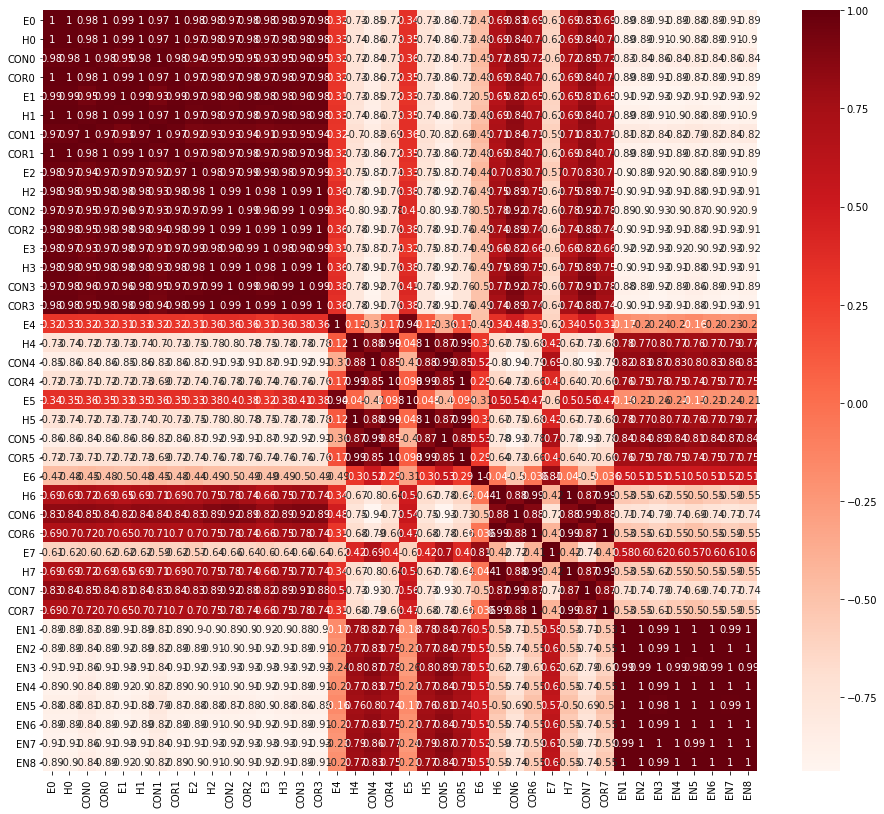

In [68]:
import seaborn as sns
plt.figure(figsize=(16,14))
corr= Together.corr()
ax=sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right'); 

In [69]:
cor_target=abs(corr['EN8'])
#Selecting highly correlated features
relevant_features= cor_target[cor_target>0.9]
relevant_features

E1      0.921263
H2      0.907353
CON2    0.900067
COR2    0.907364
E3      0.918241
H3      0.907353
COR3    0.907364
EN1     0.997245
EN2     0.999929
EN3     0.994052
EN4     1.000000
EN5     0.996756
EN6     0.999929
EN7     0.997782
EN8     1.000000
Name: EN8, dtype: float64

In [70]:
 #We delete the columns of non-relevant features

Together=Together.drop(Together.columns[[0, 1, 2, 3,  5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]], axis=1)


In [71]:
Together

E1       EN1       EN2  ...       EN6       EN7       EN8
e   0.063495  0.219391  0.221475  ...  0.221475  0.215215  0.220488
e   0.054800  0.184572  0.194816  ...  0.194816  0.184758  0.192400
e   0.078261  0.194219  0.197186  ...  0.197186  0.190785  0.195718
e   0.093723  0.149339  0.157426  ...  0.157426  0.149665  0.156454
e   0.058790  0.260474  0.261193  ...  0.261193  0.247126  0.258660
..       ...       ...       ...  ...       ...       ...       ...
g   0.014574  0.362878  0.376249  ...  0.376249  0.375775  0.377413
g   0.018316  0.264631  0.283195  ...  0.283195  0.294876  0.283549
g   0.013951  0.362867  0.373756  ...  0.373756  0.383061  0.373679
g   0.014458  0.348579  0.359941  ...  0.359941  0.370434  0.360274
g   0.014662  0.350557  0.364758  ...  0.364758  0.375582  0.364690

[107 rows x 9 columns]

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
clustering=SpectralClustering(n_clusters=2, eigen_solver='arpack', n_components=2, random_state=42, n_init=10, gamma=1, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None).fit(Together)
labels=clustering.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [73]:
import numba as nb
import numpy as np
@nb.njit(fastmath=True,error_model="numpy",parallel=True)
def gaussian_kernel_2(X, X1, sigma):
    res=np.empty((X.shape[0],X1.shape[0]))
    for i in nb.prange(X.shape[0]):
        for j in range(X1.shape[0]):
            acc=0.
            for k in range(X.shape[1]):
                acc+=(X[i,k]-X1[j,k])**2/(2*sigma**2)
            res[i,j]=np.exp(-1*acc)
    return res

In [74]:
Matrix=Together.to_numpy()
print(Matrix.shape)
Matrix

(107, 9)


array([[0.0634953 , 0.21939103, 0.22147529, 0.20483307, 0.22048848,
        0.22734374, 0.22147529, 0.21521458, 0.22048848],
       [0.05480011, 0.18457214, 0.19481642, 0.16174737, 0.19240017,
        0.20513381, 0.19481642, 0.18475827, 0.19240017],
       [0.07826053, 0.19421916, 0.19718584, 0.18097468, 0.19571771,
        0.19862776, 0.19718584, 0.19078466, 0.19571771],
       [0.09372267, 0.1493395 , 0.1574262 , 0.14274213, 0.15645431,
        0.16031609, 0.1574262 , 0.1496645 , 0.15645431],
       [0.05878951, 0.26047359, 0.26119264, 0.23410641, 0.25865993,
        0.26495188, 0.26119264, 0.24712647, 0.25865993],
       [0.06503778, 0.21099051, 0.21500799, 0.18348158, 0.21504629,
        0.22145903, 0.21500799, 0.19709273, 0.21504629],
       [0.06704265, 0.21038559, 0.21222867, 0.18182808, 0.21122615,
        0.21568662, 0.21222867, 0.19387029, 0.21122615],
       [0.06576075, 0.20798943, 0.20959962, 0.17948523, 0.20872092,
        0.21406552, 0.20959962, 0.19188429, 0.20872092],


In [75]:
# Similarity Matrix
sigma=1
SM=gaussian_kernel_2(Matrix, Matrix, sigma)
SM

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


array([[1.        , 0.99622489, 0.99737873, ..., 0.90753737, 0.92227675,
        0.91773277],
       [0.99622489, 1.        , 0.99943764, ..., 0.87122979, 0.88827869,
        0.88298915],
       [0.99737873, 0.99943764, 1.        , ..., 0.87708951, 0.89379758,
        0.88864825],
       ...,
       [0.90753737, 0.87122979, 0.87708951, ..., 1.        , 0.99924659,
        0.99962935],
       [0.92227675, 0.88827869, 0.89379758, ..., 0.99924659, 1.        ,
        0.99992277],
       [0.91773277, 0.88298915, 0.88864825, ..., 0.99962935, 0.99992277,
        1.        ]])

In [76]:
D = np.diag(np.sum(SM,axis=1))
D_half_inv = np.diag(1.0 / np.sqrt(np.sum(SM, axis=1)))
M = np.dot(D_half_inv, np.dot((D - SM), D_half_inv))

In [77]:
D

array([[101.40360611,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  99.81901792,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 100.09442566, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,  99.00390386,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         99.91686825,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  99.64275946]])

In [78]:
D_half_inv 

array([[0.0993055 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10009061, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.09995282, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.1005018 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.10004159,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1001791 ]])

In [79]:
M

array([[ 0.99013842, -0.00990203, -0.00989985, ..., -0.00905757,
        -0.00916252, -0.00912991],
       [-0.00990203,  0.98998187, -0.00999871, ..., -0.00876395,
        -0.00889453, -0.00885372],
       [-0.00989985, -0.00999871,  0.99000943, ..., -0.00881075,
        -0.00893747, -0.0088982 ],
       ...,
       [-0.00905757, -0.00876395, -0.00881075, ...,  0.98989939,
        -0.01004679, -0.01006445],
       [-0.00916252, -0.00889453, -0.00893747, ..., -0.01004679,
         0.98999168, -0.0100213 ],
       [-0.00912991, -0.00885372, -0.0088982 , ..., -0.01006445,
        -0.0100213 ,  0.98996415]])

In [80]:
(e_vals, e_vecs) = np.linalg.eigh(M) 
(e_vals, e_vecs)

(array([8.17211590e-16, 9.17955655e-01, 9.98150333e-01, 9.99731922e-01,
        9.99939683e-01, 9.99962015e-01, 9.99977464e-01, 9.99994699e-01,
        9.99995803e-01, 9.99997835e-01, 9.99998593e-01, 9.99998864e-01,
        9.99999355e-01, 9.99999642e-01, 9.99999741e-01, 9.99999874e-01,
        9.99999955e-01, 9.99999971e-01, 9.99999974e-01, 9.99999978e-01,
        9.99999988e-01, 9.99999994e-01, 9.99999995e-01, 9.99999996e-01,
        9.99999997e-01, 9.99999998e-01, 9.99999998e-01, 9.99999999e-01,
        9.99999999e-01, 9.99999999e-01, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.000000

In [81]:
# Let U be the matrix containing the differents vectors as columns
U=e_vecs

In [82]:
U

array([[ 0.09795994, -0.05488238, -0.0891597 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09719154, -0.08304534, -0.03833543, ..., -0.00246485,
         0.00250756,  0.00124854],
       [ 0.09732552, -0.07874552, -0.04125035, ...,  0.00071868,
        -0.0042354 , -0.0023377 ],
       ...,
       [ 0.0967939 ,  0.094369  , -0.0066628 , ..., -0.03328222,
        -0.18322778,  0.04663975],
       [ 0.09723916,  0.08177826, -0.03835965, ...,  0.06058128,
        -0.17890022, -0.08266116],
       [ 0.09710569,  0.0857581 , -0.02841232, ..., -0.3882325 ,
        -0.03698048,  0.03590997]])

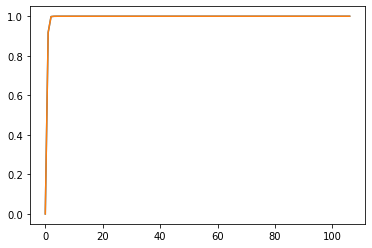

In [83]:
fig = plt.figure()
ax1 = plt.plot(e_vals)
plt.plot(e_vals)
#ax1.title.set_text('eigenvalues')
#i = np.where(e < 10e-6)[0]
#ax2 = plt.subplot(122)
#plt.plot(v[:, i[0]])
#fig.tight_layout()
plt.show()

In [84]:
e_vals_sorted_indices=np.argsort(e_vals)
e_vals_sorted=e_vals[e_vals_sorted_indices]
e_vals_sorted

array([8.17211590e-16, 9.17955655e-01, 9.98150333e-01, 9.99731922e-01,
       9.99939683e-01, 9.99962015e-01, 9.99977464e-01, 9.99994699e-01,
       9.99995803e-01, 9.99997835e-01, 9.99998593e-01, 9.99998864e-01,
       9.99999355e-01, 9.99999642e-01, 9.99999741e-01, 9.99999874e-01,
       9.99999955e-01, 9.99999971e-01, 9.99999974e-01, 9.99999978e-01,
       9.99999988e-01, 9.99999994e-01, 9.99999995e-01, 9.99999996e-01,
       9.99999997e-01, 9.99999998e-01, 9.99999998e-01, 9.99999999e-01,
       9.99999999e-01, 9.99999999e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      

[Text(0, 0.5, '$\\lambda$'),
 Text(0.5, 0, 'index'),
 Text(0.5, 1.0, 'Sorted Eigenvalues Graph Laplacian')]

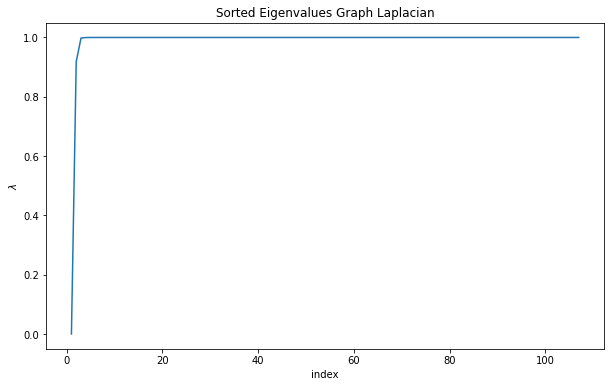

In [85]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,6)) 
sns.lineplot(x=range(1, e_vals_sorted_indices.size+1), y=e_vals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$')

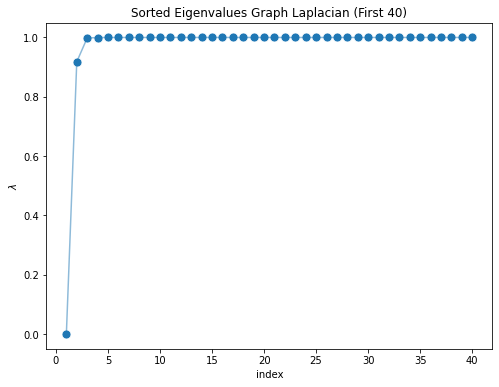

In [86]:
index_lim=40
fig, ax=plt.subplots(figsize=(8,6)) 
sns.scatterplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], alpha=0.5, ax=ax)
#ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [89]:
smallest_e_vals_index=np.argwhere((8.1721160e-16<e_vals)&(e_vals<9.98150332e-01))
e_vals[smallest_e_vals_index]

array([[0.91795566]])

In [90]:
proj_df=pd.DataFrame(e_vecs[:, smallest_e_vals_index.squeeze()])
proj_df.columns=['v_'+str(c+1) for c in proj_df.columns]
proj_df.head()
proj_df.to_excel('newglcmbg2.xlsx')

In [91]:
from sklearn.cluster import KMeans
inertias=[]
k_candidates=range(1,10)
for k in k_candidates:
  k_means=KMeans(random_state=42, n_clusters=k)
  k_means.fit(proj_df)
  inertias.append(k_means.inertia_)

[Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k'), Text(0.5, 1.0, 'Inertia K-Means')]

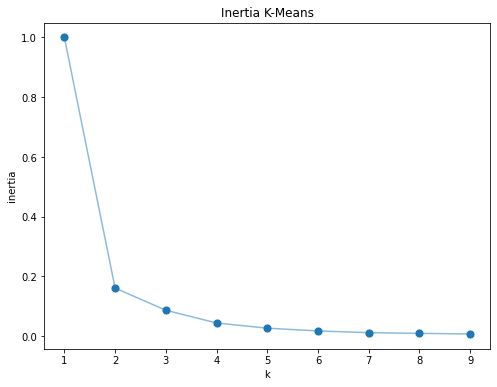

In [92]:
fig, ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x=k_candidates, y=inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y=inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')

In [93]:
def run_k_means(df, n_clusters):
  k_means=KMeans(random_state=25, n_clusters=n_clusters)
  k_means.fit(df)
  cluster=k_means.predict(df)
  return cluster

cluster=run_k_means(proj_df, n_clusters=2)  
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

Text(0.3, 0.92, 'smallest Eigenvectors Cluster')

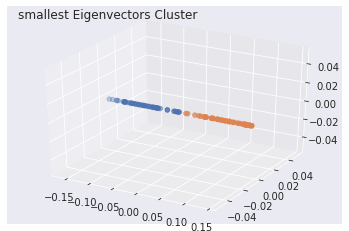

In [94]:
sns.set_style('darkgrid',)
sns.set_palette(palette='deep')
sns_c=sns.color_palette(palette='deep')
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs=proj_df['v_1'], ys=0, zs=0, c=[{0: sns_c[0], 1: sns_c[1], 2: sns_c[2]}.get(c) for c in cluster]
)
ax.set_title('smallest Eigenvectors Cluster', x=0.3)

In [101]:
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
count8=0
count9=0
True_labels=[]
for i in range(55):
  True_labels.append(0)
for i in range(52):
  True_labels.append(1) 
for i in range(52):
  True_labels.append(2)
for i in range(53):
  if True_labels[i]==cluster[i]:count1+=1
  elif cluster[i]==1:count2+=1
  elif True_labels[i]==2:count3+=1
print(count1)
print(count2)
print(count3)
for i in range(55, 107):
  if True_labels[i]==cluster[i]:count4+=1
  elif cluster[i]==0:count5+=1
  elif cluster[i]==2:count6+=1
print(count4)
print(count5)
print(count6)

print('the number of empty images well classified over 55 is equal to', count1)
print('the number of good images well classified over 53 is equal to', count4)
#print('the accuracy for bad is equal to', (count1/53)*100 )
print('the accuracy for empty is equal to', (count1/55)*100 )
print('the accuracy for good is equal to', (count4/52)*100 )
print('the total accuracy is given by', (count1+count4)*100/107)

51
2
0
51
1
0
the number of empty images well classified over 55 is equal to 51
the number of good images well classified over 53 is equal to 51
the accuracy for empty is equal to 92.72727272727272
the accuracy for good is equal to 98.07692307692307
the total accuracy is given by 95.32710280373831
